# Investigate events in density space

- plot density transects
- plot density streamfunction transects
- plot desnity regions


In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='darkgray')

In [3]:
### load data

# composite
sMOC_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite-test.nc'
sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'

# anomalies
sigma_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_anomaly.nc'
sMOC_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sMOC_anomaly.nc'

## Density plots

In [49]:
ds_sigma = xr.open_dataset(sigma_path)

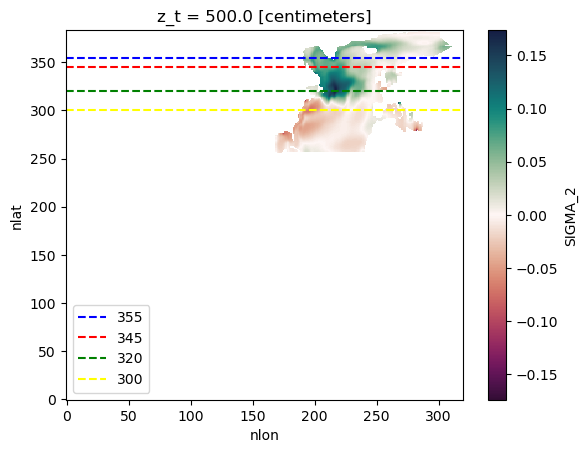

In [50]:
ds_sigma.SIGMA_2.isel(z_t=0).plot(cmap=cmo.curl_r)
plt.axhline(y=355, linestyle='--', color='blue', label='355')
plt.axhline(y=345, linestyle='--', color='red', label='345')
plt.axhline(y=320, linestyle='--', color='green', label='320')
plt.axhline(y=300, linestyle='--', color='yellow', label='300')

plt.legend(loc='lower left')

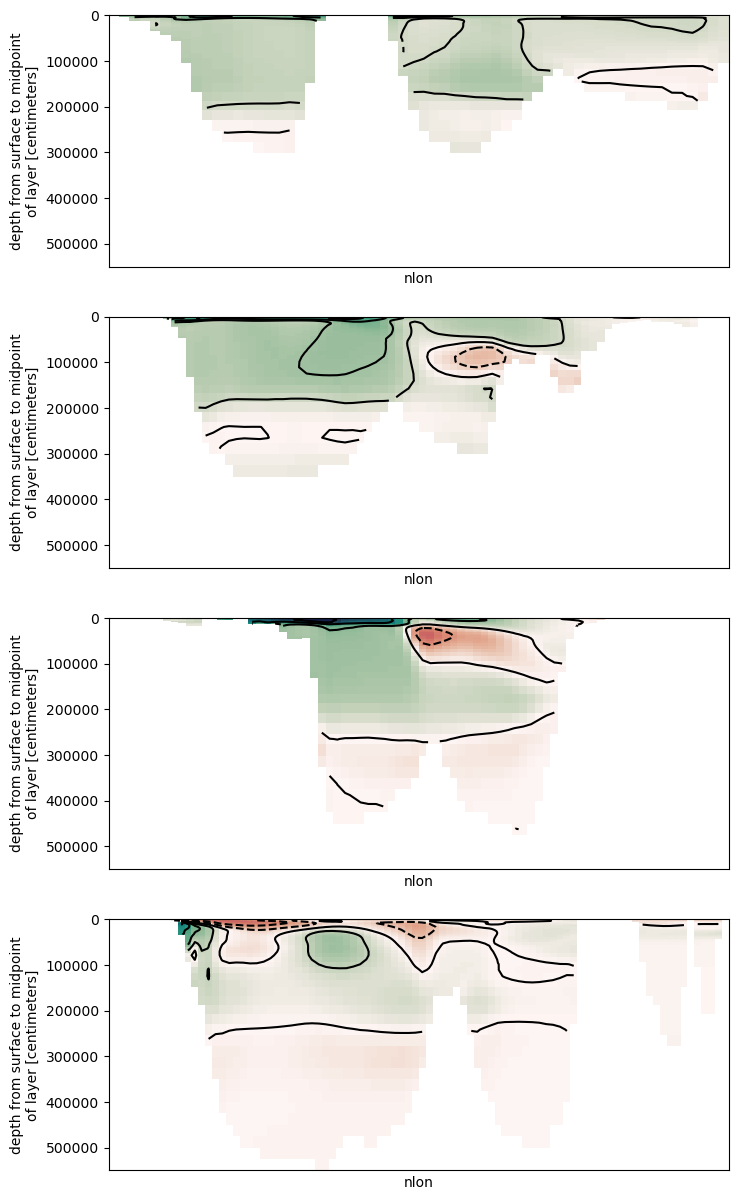

In [57]:
vmin, vmax = -0.16, 0.16 

fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

ds_sigma.SIGMA_2.isel(nlat=355, nlon=slice(190, 250)).plot(ax=axes[0], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=355, nlon=slice(190, 250)).plot.contour(ax=axes[0], yincrease=False, levels=10, colors='k')
axes[0].set_xticks([])
axes[0].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=345, nlon=slice(190, 270)).plot(ax=axes[1], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=345, nlon=slice(190, 270)).plot.contour(ax=axes[1], yincrease=False, levels=10, colors='k')
axes[1].set_xticks([])
axes[1].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=320, nlon=slice(190, 270)).plot(ax=axes[2], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=320, nlon=slice(190, 270)).plot.contour(ax=axes[2], yincrease=False, levels=10, colors='k')
axes[2].set_xticks([])
axes[2].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=300, nlon=slice(180, 270)).plot(ax=axes[3], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=300, nlon=slice(180, 270)).plot.contour(ax=axes[3], yincrease=False, levels=10, colors='k')
axes[3].set_xticks([])
axes[3].set_xticklabels([])

plt.show()

In [7]:
ds_sigma_annual = xr.open_dataset(sigma_annual)
time=np.arange(0, len(ds_sigma_annual.time.values))
vmin, vmax = 35.8, 37.1 

sigma_355 = ds_sigma_annual.SIGMA_2.isel(nlat = 355).mean('nlon')
sigma_345 = ds_sigma_annual.SIGMA_2.isel(nlat = 345).mean('nlon')
sigma_320 = ds_sigma_annual.SIGMA_2.isel(nlat = 320).mean('nlon')
sigma_300 = ds_sigma_annual.SIGMA_2.isel(nlat = 300).mean('nlon')

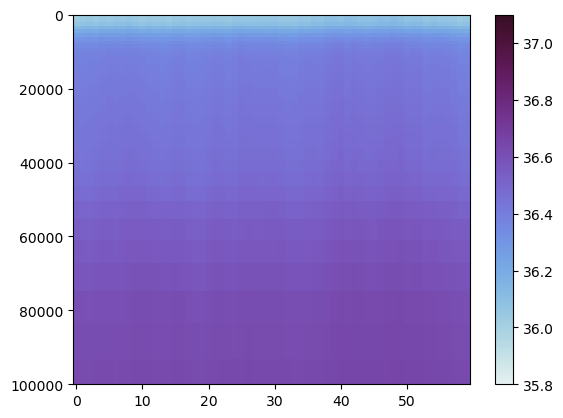

In [8]:
fig, ax = plt.subplots()  
pc = ax.pcolormesh(time, ds_sigma_annual.z_t, sigma_355.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(pc)
ax.set_ylim([0, 100000])  
ax.invert_yaxis()

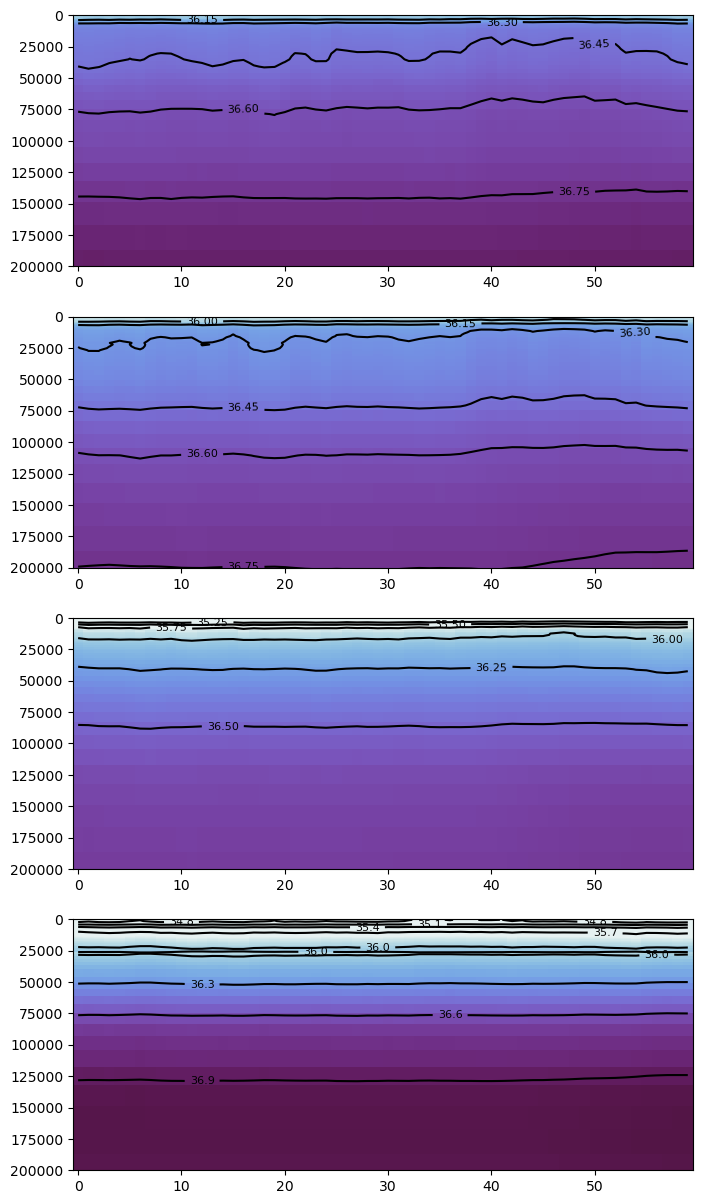

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t, sigma_355.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, sigma_355.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 200000])  
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, sigma_345.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, sigma_345.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 200000])  
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, sigma_320.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, sigma_320.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 200000])  
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time, ds_sigma_annual.z_t, sigma_300.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, ds_sigma_annual.z_t, sigma_300.T, colors='k')
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_ylim([0, 200000])  
axes[3].invert_yaxis()

## Density anomalies

In [15]:
anom_sigma_355 = sigma_355 - sigma_355.isel(time=slice(0,40)).mean('time')
anom_sigma_345 = sigma_345 - sigma_345.isel(time=slice(0,40)).mean('time')
anom_sigma_320 = sigma_320 - sigma_320.isel(time=slice(0,40)).mean('time')
anom_sigma_300 = sigma_300 - sigma_300.isel(time=slice(0,40)).mean('time')

vmin, vmax = -0.16, 0.16 

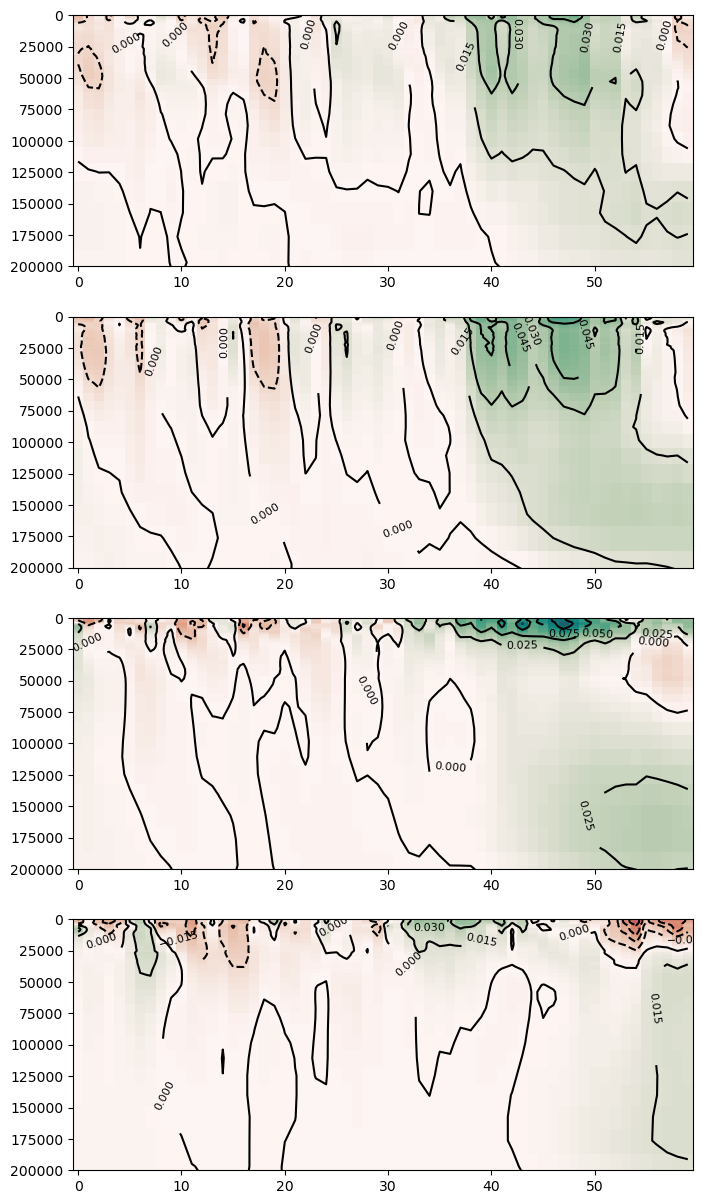

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_355.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_sigma_355.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 200000])  
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_345.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_sigma_345.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 200000])  
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_320.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_sigma_320.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 200000])  
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_300.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, ds_sigma_annual.z_t, anom_sigma_300.T, colors='k')
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_ylim([0, 200000])  
axes[3].invert_yaxis()

## Density streamfunction plots

In [17]:
ds_sMOC = xr.open_dataset(sMOC_annual)
time=np.arange(0, len(ds_sMOC.time.values))

sigma_level =[12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6, 30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
                   33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.15, 36.2, 36.25, 36.3, 36.35, 
                   36.4, 36.42, 36.44, 36.46, 36.48, 36.5, 36.52, 36.54, 36.56, 36.57, 
                   36.58, 36.59, 36.6, 36.61, 36.62, 36.63, 36.64, 36.65, 36.66, 36.67, 36.68, 36.69, 36.7, 36.71, 36.72, 36.73, 36.74, 36.75, 36.76, 
                   36.78, 36.8, 36.82, 36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06, 37.08, 37.1, 37.12, 
                   37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45, 37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
fake_sigma = np.arange(len(sigma_level))

vmin, vmax = -30, 30

In [18]:
smoc_355 = ds_sMOC.densMOC.isel(nlat=355-250)
smoc_345 = ds_sMOC.densMOC.isel(nlat=345-250)
smoc_320 = ds_sMOC.densMOC.isel(nlat=320-250)
smoc_300 = ds_sMOC.densMOC.isel(nlat=300-250)

(40.0, 100.0)

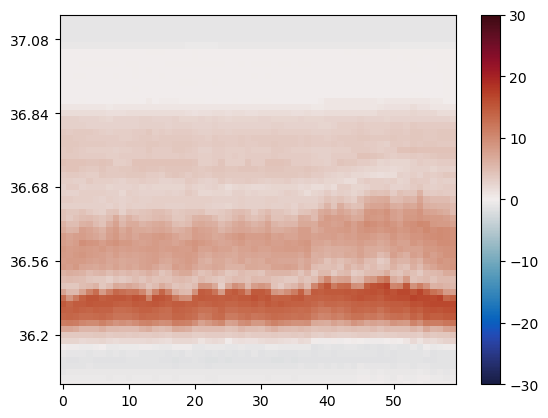

In [20]:
fig, ax = plt.subplots()  

pc = ax.pcolormesh(time,fake_sigma, smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(pc)

plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])

ax.set_ylim([40, 100])  

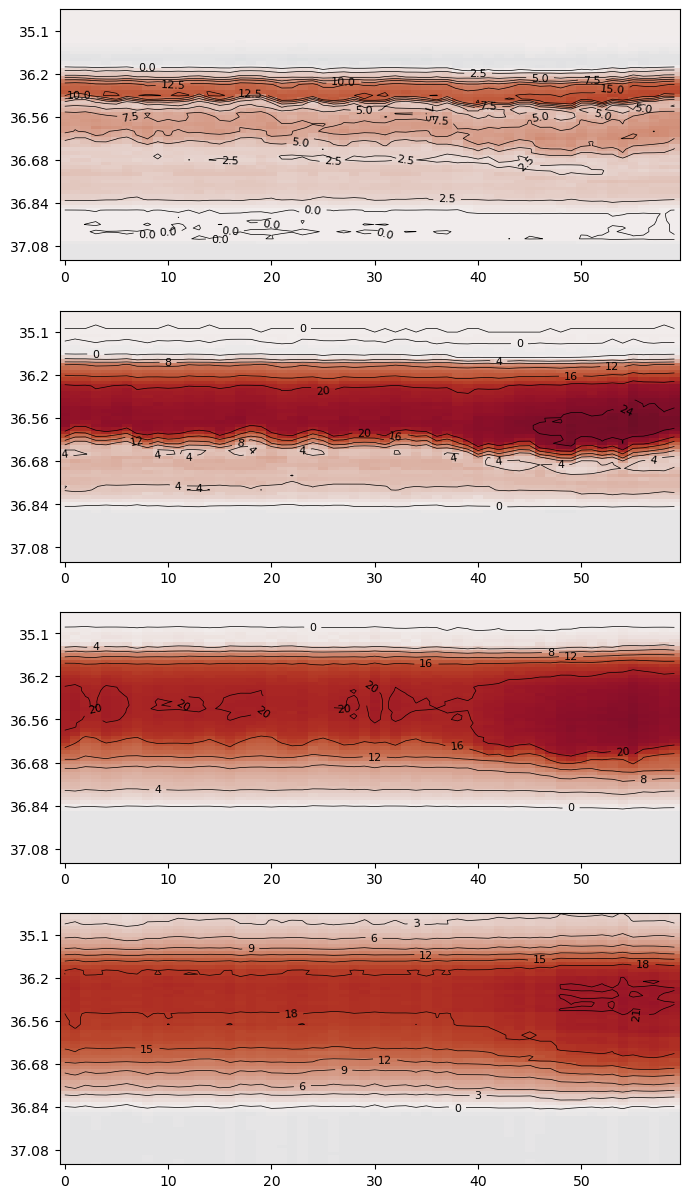

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, fake_sigma, smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, fake_sigma, smoc_355.T, colors='k', linewidths=0.5)
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[0].set_ylim([30, 100])
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, fake_sigma, smoc_345.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, fake_sigma, smoc_345.T, colors='k', linewidths=0.5)
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[1].set_ylim([30, 100]) 
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time,fake_sigma, smoc_320.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, fake_sigma, smoc_320.T, colors='k', linewidths=0.5)
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[2].set_ylim([30, 100]) 
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time,fake_sigma, smoc_300.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, fake_sigma, smoc_300.T, colors='k', linewidths=0.5)
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[3].set_ylim([30, 100]) 
axes[3].invert_yaxis()
plt.show()

In [40]:
anom_smoc_355 = smoc_355 - smoc_355.isel(time=slice(0,40)).mean('time')
anom_smoc_345 = smoc_345 - smoc_345.isel(time=slice(0,40)).mean('time')
anom_smoc_320 = smoc_320 - smoc_320.isel(time=slice(0,40)).mean('time')
anom_smoc_300 = smoc_300 - smoc_300.isel(time=slice(0,40)).mean('time')

vmin, vmax = -20, 20

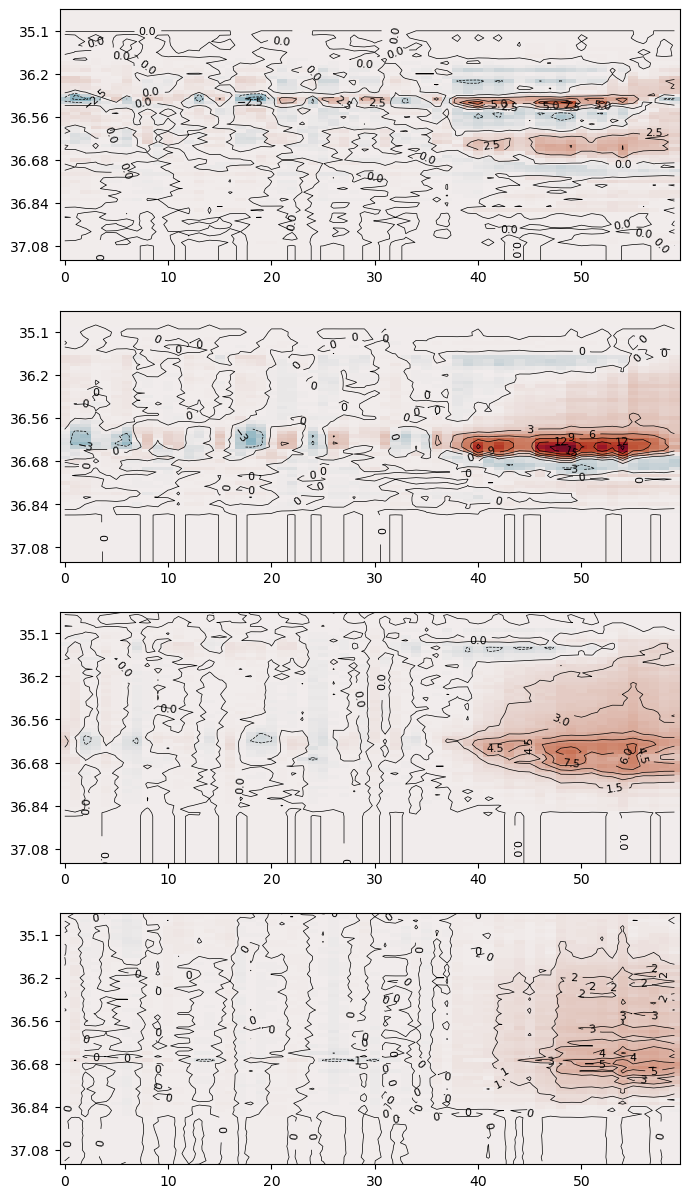

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, fake_sigma, anom_smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, fake_sigma, anom_smoc_355.T, colors='k', linewidths=0.5)
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[0].set_ylim([30, 100])
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, fake_sigma, anom_smoc_345.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, fake_sigma, anom_smoc_345.T, colors='k', linewidths=0.5)
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[1].set_ylim([30, 100]) 
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time,fake_sigma, anom_smoc_320.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, fake_sigma, anom_smoc_320.T, colors='k', linewidths=0.5)
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[2].set_ylim([30, 100]) 
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time,fake_sigma, anom_smoc_300.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, fake_sigma, anom_smoc_300.T, colors='k', linewidths=0.5)
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[3].set_ylim([30, 100]) 
axes[3].invert_yaxis()

## Evolution of density within specified regions

In [4]:
ds_sigma = xr.open_dataset(sigma_path)

ds_sigma_annual = xr.open_dataset(sigma_annual)
time=np.arange(0, len(ds_sigma_annual.time.values))

for ds in (ds_sigma, ds_sigma_annual):

    ds['z_t'] = ds.z_t *1e-2
    ds['z_t'].attrs['units'] = 'm'

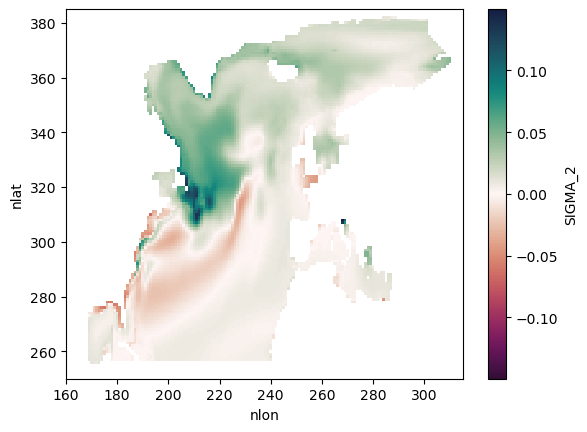

In [5]:
ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000, 9.8470586e+02)).mean('z_t').plot(cmap=cmo.curl_r)
plt.xlim(160, 315)
plt.ylim(250, 385)
plt.show()

### Geographical regions

In [6]:
grid_name = 'POP_gx1v7'
region_defs_lab = {'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]} 
lab_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_lab, mask_name='lab')
lab_mask3d = lab_mask3d.sum('region') # apparently necessary even in this case

region_defs_irm = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [60., 66.],'TLONG': [300., 340.]}}]}
irm_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_irm, mask_name='irm')
irm_mask3d = irm_mask3d.sum('region')

region_defs_esp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [50., 66.],'TLONG': [340., 355.]}}],}
esp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_esp, mask_name='esp')
esp_mask3d = esp_mask3d.sum('region')

region_defs_csp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [50., 60.],'TLONG': [310., 340.]}}],}
csp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_csp, mask_name='csp')
csp_mask3d = csp_mask3d.sum('region')

region_defs_nac = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [43., 50.],'TLONG': [305., 320.]}}],}
nac_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_nac, mask_name='nac')
nac_mask3d = nac_mask3d.sum('region')

lab_mask3d = lab_mask3d.roll(nlon=-100)
irm_mask3d = irm_mask3d.roll(nlon=-100)
esp_mask3d = esp_mask3d.roll(nlon=-100)
csp_mask3d = csp_mask3d.roll(nlon=-100)
nac_mask3d = nac_mask3d.roll(nlon=-100)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


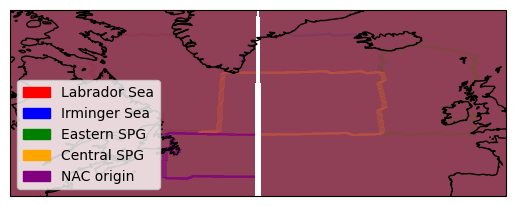

In [7]:
masks = [lab_mask3d,irm_mask3d,esp_mask3d,csp_mask3d,nac_mask3d]

colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['Labrador Sea', 'Irminger Sea', 'Eastern SPG', 'Central SPG', 'NAC origin'] 

lon_min, lon_max = -80, 0
lat_min, lat_max = 40, 70

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

for i, mask in enumerate(masks):
    ax.contourf(ds_sigma.TLONG, ds_sigma.TLAT, mask.roll(nlon=+100), colors=colors[i], transform=ccrs.PlateCarree(), alpha=0.5)

ax.coastlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

legend_handles = [mpl.patches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=legend_handles, loc='lower left')

plt.show()

#### Plotting density change in  geographical regions

In [8]:
lab_region = ds_sigma_annual.SIGMA_2.where(lab_mask3d == 1).mean(dim=['nlat', 'nlon'])
irm_region = ds_sigma_annual.SIGMA_2.where(irm_mask3d == 1).mean(dim=['nlat', 'nlon'])
esp_region = ds_sigma_annual.SIGMA_2.where(esp_mask3d == 1).mean(dim=['nlat', 'nlon'])
csp_region = ds_sigma_annual.SIGMA_2.where(csp_mask3d == 1).mean(dim=['nlat', 'nlon'])
nac_region = ds_sigma_annual.SIGMA_2.where(nac_mask3d == 1).mean(dim=['nlat', 'nlon'])

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_irm_region = irm_region - irm_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_csp_region = csp_region - csp_region.isel(time=slice(0,40)).mean('time')
anom_nac_region = nac_region - nac_region.isel(time=slice(0,40)).mean('time')

vmin, vmax = -0.16, 0.16 

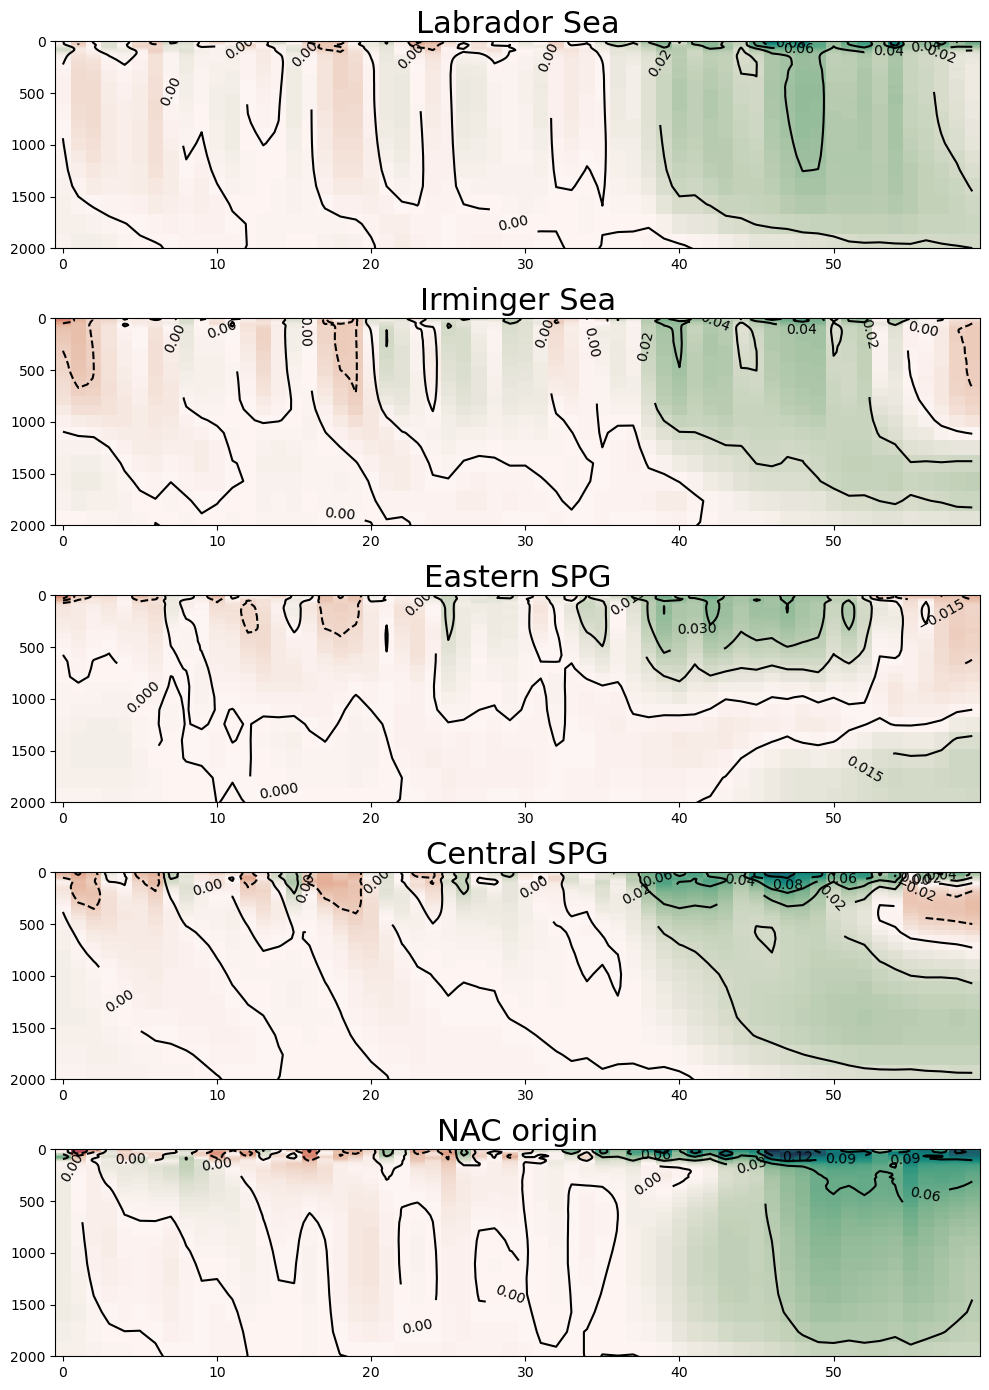

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(10,14))

plt.subplots_adjust(hspace=0.2) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=10)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea', fontsize=22)

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_irm_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_irm_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=10)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Irminger Sea', fontsize=22)

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=10)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG', fontsize=22)

pc = axes[3].pcolormesh(time, ds_sigma_annual.z_t, anom_csp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, ds_sigma_annual.z_t, anom_csp_region.T, colors='k')
axes[3].clabel(contour_plot, inline=True, fontsize=10)
axes[3].set_ylim([0, 2000])  
axes[3].invert_yaxis()
axes[3].set_title('Central SPG', fontsize=22)

pc = axes[4].pcolormesh(time, ds_sigma_annual.z_t, anom_nac_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[4].contour(time, ds_sigma_annual.z_t, anom_nac_region.T, colors='k')
axes[4].clabel(contour_plot, inline=True, fontsize=10)
axes[4].set_ylim([0, 2000])  
axes[4].invert_yaxis()
axes[4].set_title('NAC origin', fontsize=22)

plt.tight_layout()
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/') + 'density_change_geographical_regions.png', bbox_inches='tight', dpi=300)

### Regions of strong anomalies

In [12]:
def open_and_replace(data_file, std_file, variable_name):
    
    ds_data = xr.open_dataset(data_file).roll(nlon=+100)
    ds_std = xr.open_dataset(std_file)
    replacement_value = 0
    for ds in (ds_data, ds_std):
        ds['TLAT'] = xr.where(
            np.logical_or(np.isnan(ds['TLAT']), np.isinf(ds['TLAT']) | np.ma.getmask(ds['TLAT'])),
            replacement_value,
            ds['TLAT'])
        ds['TLONG'] = xr.where(
            np.logical_or(np.isnan(ds['TLONG']), np.isinf(ds['TLONG']) | np.ma.getmask(ds['TLONG'])),
            replacement_value,
            ds['TLONG'])
    if variable_name in ('TEMP', 'SALT', 'SIGMA_2', 'VVEL'):
        da_data = ds_data[variable_name].sel(z_t=slice(5.0000000, 9.8470586e+02)).mean('z_t').squeeze()
        da_std = ds_std['std_values'].sel(z_t=slice(5.0000000, 9.8470586e+02)).mean('z_t').squeeze()
    elif variable_name == 'HMXL':
        da_data = ds_data[variable_name].roll(nlon=-100)*1e-2
        da_std = ds_std['std_values']*1e-2
    else:
        da_data = ds_data[variable_name]
        da_std = ds_std['std_values']

    return da_data, da_std

In [ ]:
path= '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/'
data_file = [path+'temp_anomaly.nc',path+'salt_anomaly.nc',path+'hmxl_anomaly.nc',path+'shf_anomaly.nc',path+'ssh_anomaly.nc', path+'sigma_anomaly.nc']
variable_name = ['TEMP','SALT','HMXL','SHF','SSH','SIGMA_2']
std_file = [path+'temp_mean_std.nc',path+'salt_mean_std.nc',path+'hmxl_mean_std.nc',path+'shf_mean_std.nc',path+'ssh_mean_std.nc']

da_temp, temp_std = open_and_replace(data_file[0], std_file[0], variable_name[0])
da_salt, salt_std = open_and_replace(data_file[1], std_file[1], variable_name[1])
da_sigma, sigma_std = open_and_replace(data_file[5], std_file[1], variable_name[5])

#### between 54 and 60 North

In [ ]:
grid_name = 'POP_gx1v7'
region_defs_lab = {'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [54.0, 60.0]}}]} 
lab_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_lab, mask_name='lab')

region_defs_esp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [54., 60.],'TLONG': [340., 355.]}}],}
esp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_esp, mask_name='esp')

region_defs_csp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [54., 60.],'TLONG': [300., 340.]}}],}
csp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_csp, mask_name='csp')

lab_mask3d = lab_mask3d.roll(nlon=-100)
esp_mask3d = esp_mask3d.roll(nlon=-100)
csp_mask3d = csp_mask3d.roll(nlon=-100)

#### Temperature

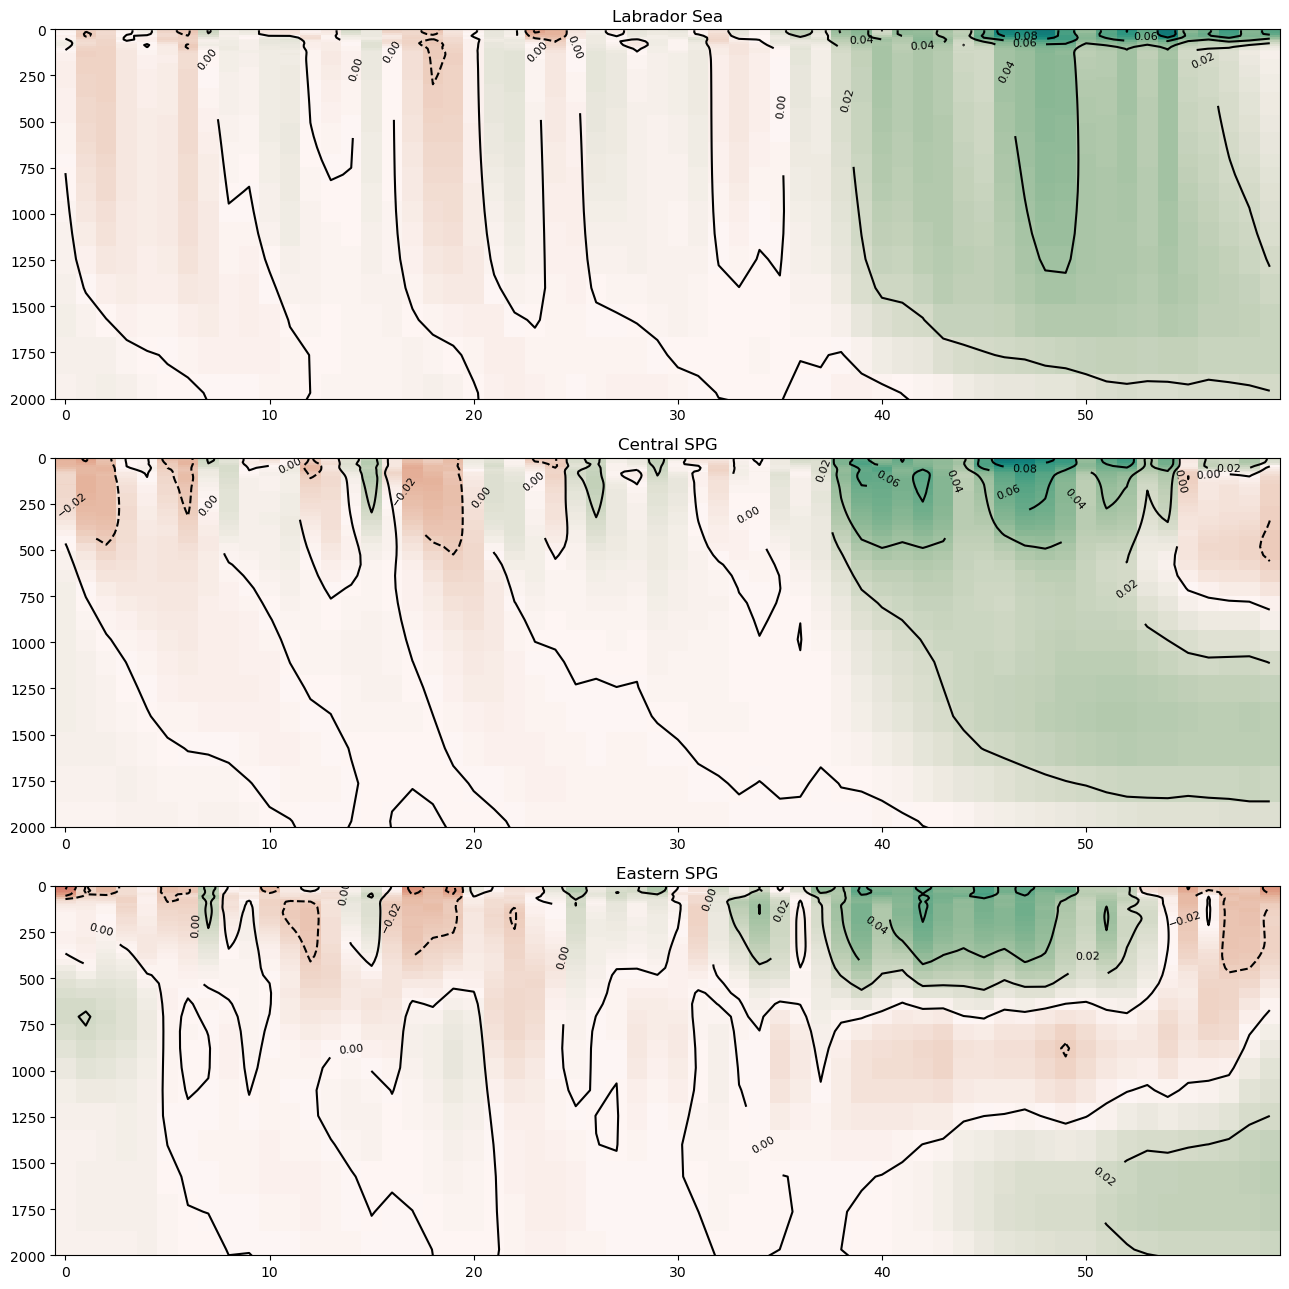

In [78]:
mask_temp = da_temp > 0.15
mask_temp = mask_temp.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)
csp_region = ds_sigma_annual.SIGMA_2.where((csp_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_csp_region = csp_region - csp_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(13,13))
plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea')

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_csp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_csp_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Central SPG')

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG')

plt.tight_layout()
plt.show()

#### Salinity

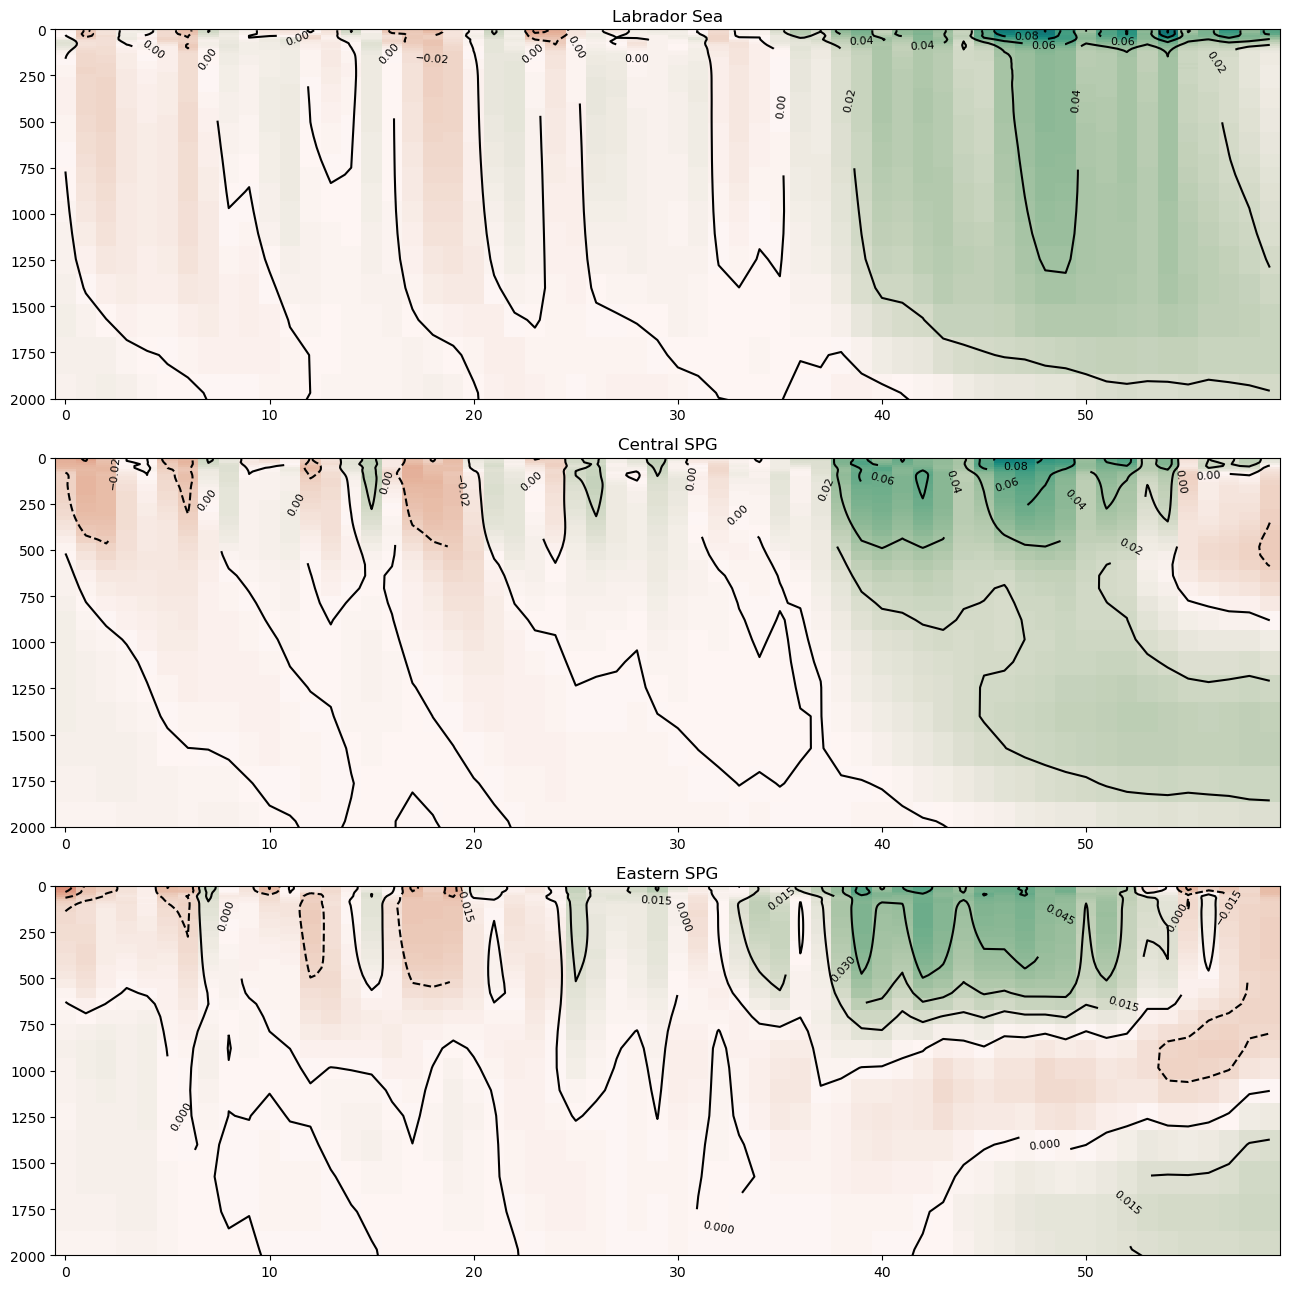

In [79]:
mask_salt = da_salt > 0.05
mask_salt = mask_salt.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)
csp_region = ds_sigma_annual.SIGMA_2.where((csp_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_csp_region = csp_region - csp_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(13,13))

plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea')

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_csp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_csp_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Central SPG')

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG')

plt.tight_layout()
plt.show()

#### Density

In [ ]:
mask_sigma = da_sigma > 0.03
mask_sigma = mask_sigma.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
csp_region = ds_sigma_annual.SIGMA_2.where((csp_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_csp_region = csp_region - csp_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(10,8))

plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=10)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea', fontsize=22)

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_csp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_csp_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=10)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Central SPG', fontsize=22)

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=10)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG', fontsize=22)

plt.tight_layout()
plt.show()

#### between 60 and 65 North

In [72]:
grid_name = 'POP_gx1v7'
region_defs_lab = {'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [60.0, 66.0]}}]} 
lab_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_lab, mask_name='lab')

region_defs_esp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [60., 66.],'TLONG': [340., 355.]}}],}
esp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_esp, mask_name='esp')

region_defs_irm = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [60., 66.],'TLONG': [300., 340.]}}],}
irm_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_irm, mask_name='irm')

lab_mask3d = lab_mask3d.roll(nlon=-100)
esp_mask3d = esp_mask3d.roll(nlon=-100)
irm_mask3d = irm_mask3d.roll(nlon=-100)

#### Temperature

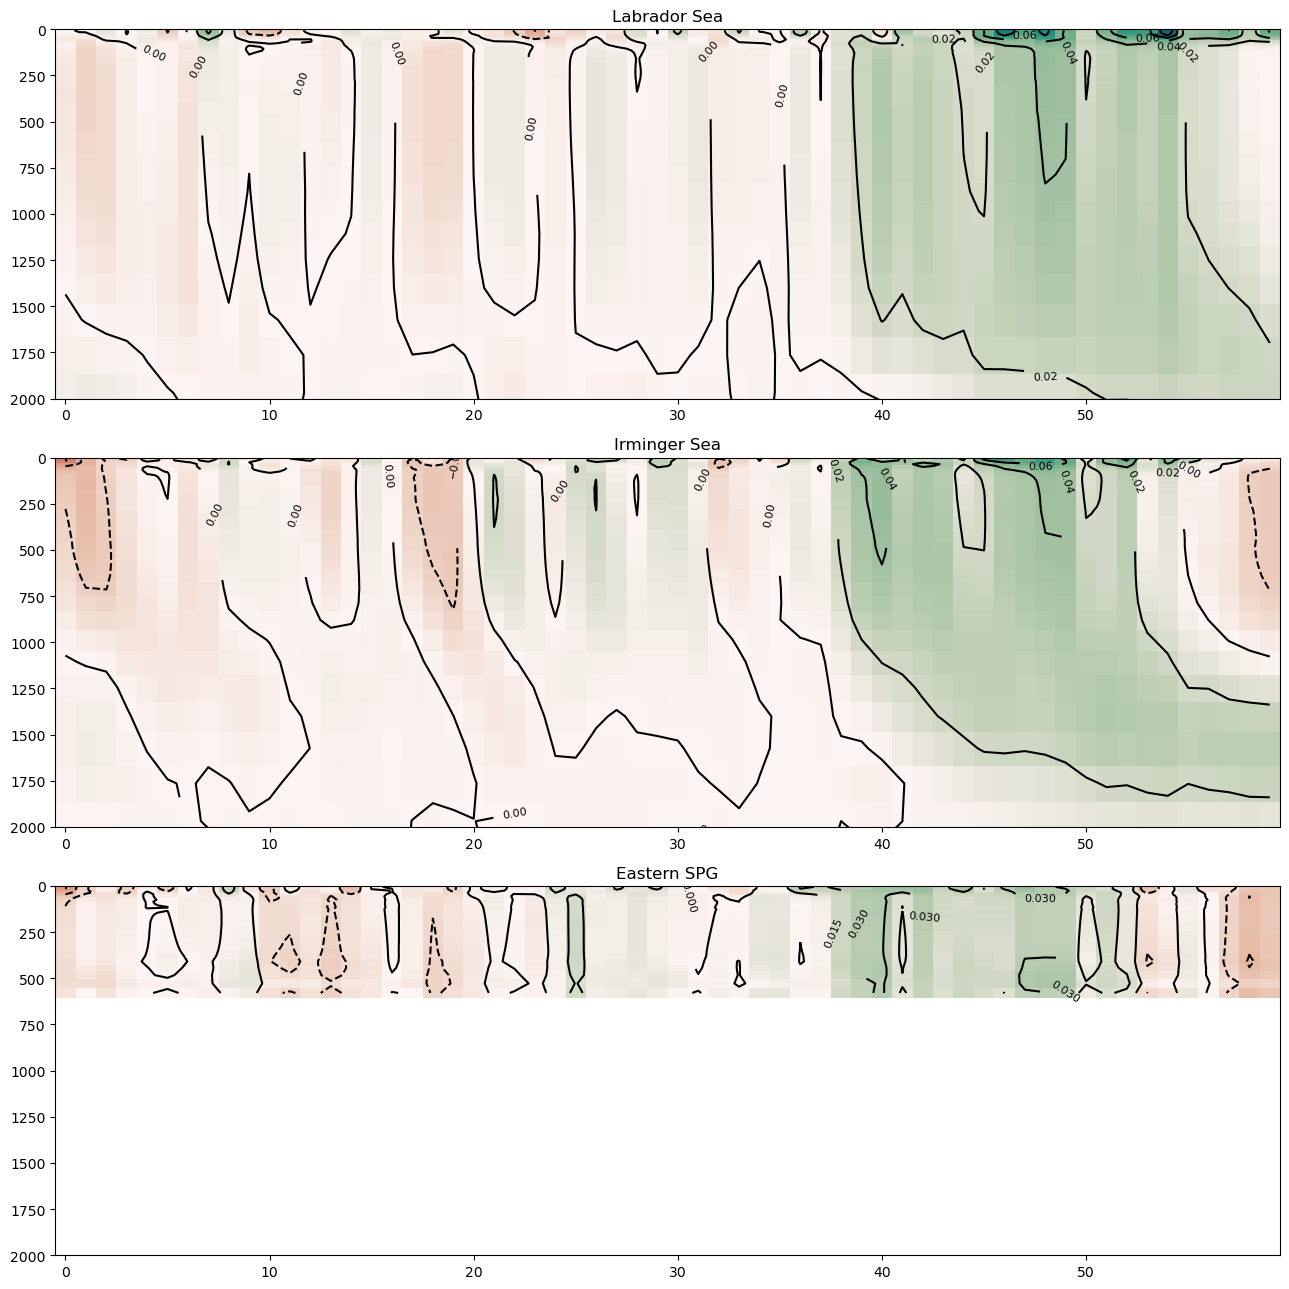

In [73]:
mask_temp = da_temp > 0.15
mask_temp = mask_temp.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)
irm_region = ds_sigma_annual.SIGMA_2.where((irm_mask3d == 1) & (mask_temp == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_irm_region = irm_region - irm_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(13,13))
plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea')

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_irm_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_irm_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Irminger Sea')

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG')

plt.tight_layout()
plt.show()

#### Salinity

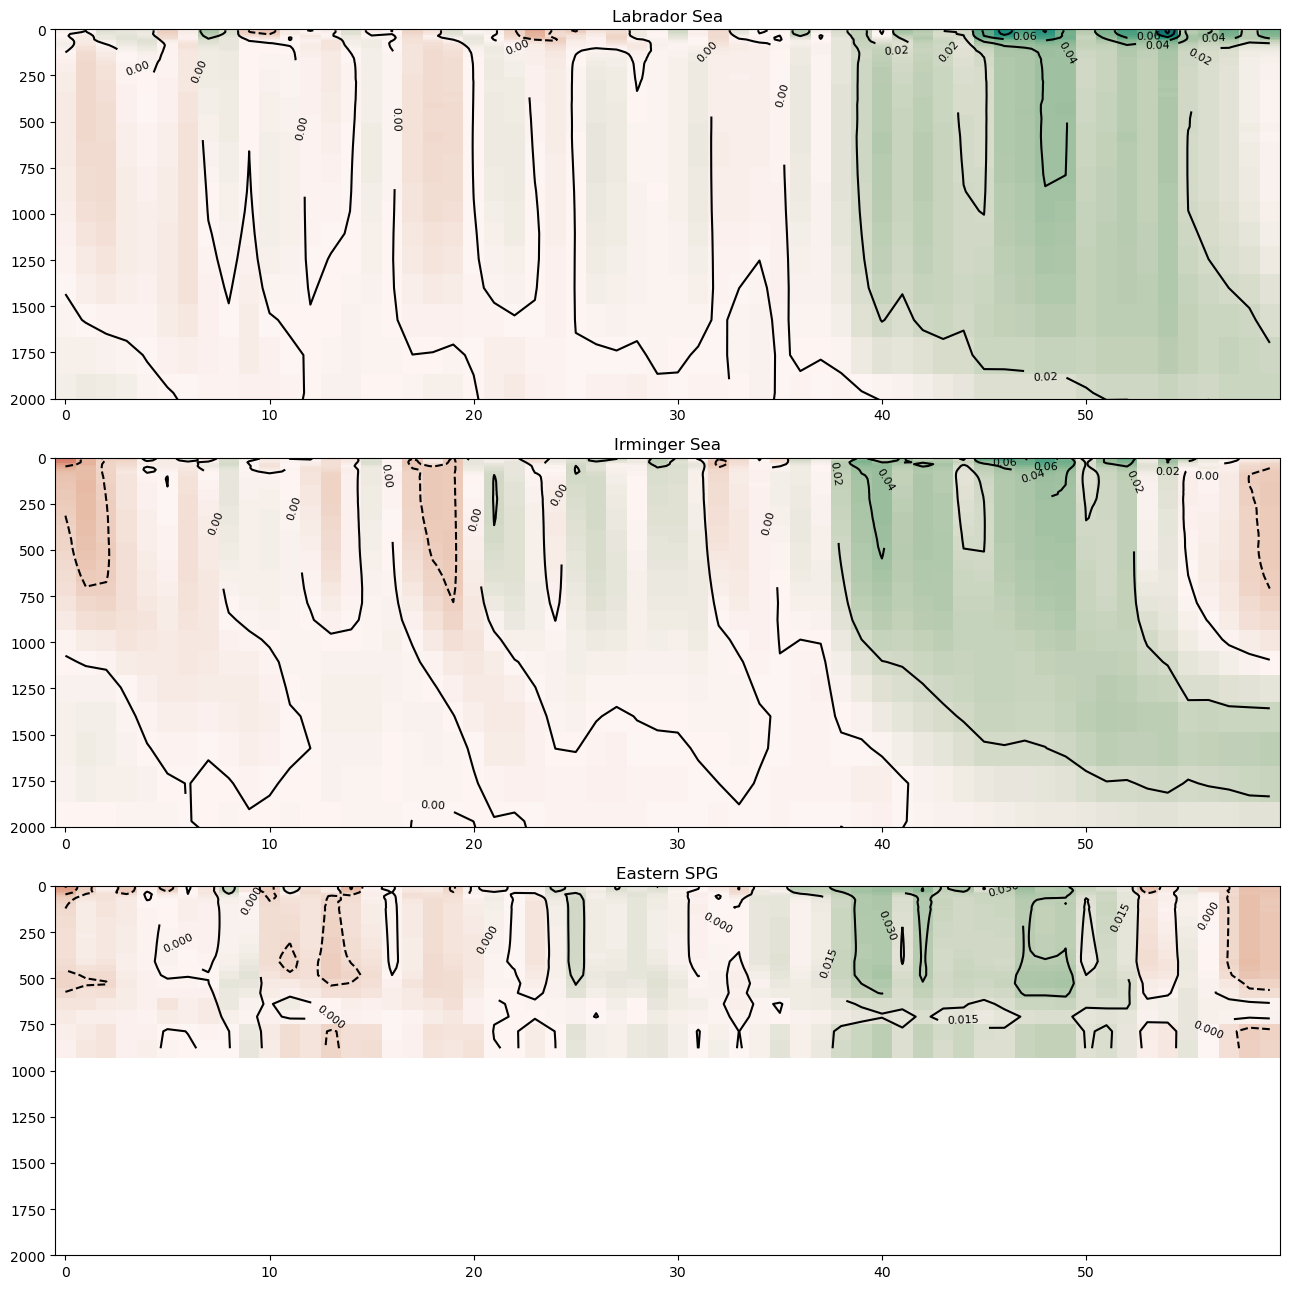

In [74]:
mask_salt = da_salt > 0.05
mask_salt = mask_salt.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)
irm_region = ds_sigma_annual.SIGMA_2.where((irm_mask3d == 1) & (mask_salt == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_irm_region = irm_region - irm_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(13,13))

plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea')

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_irm_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_irm_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Irminger Sea')

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG')

plt.tight_layout()
plt.show()

#### Density

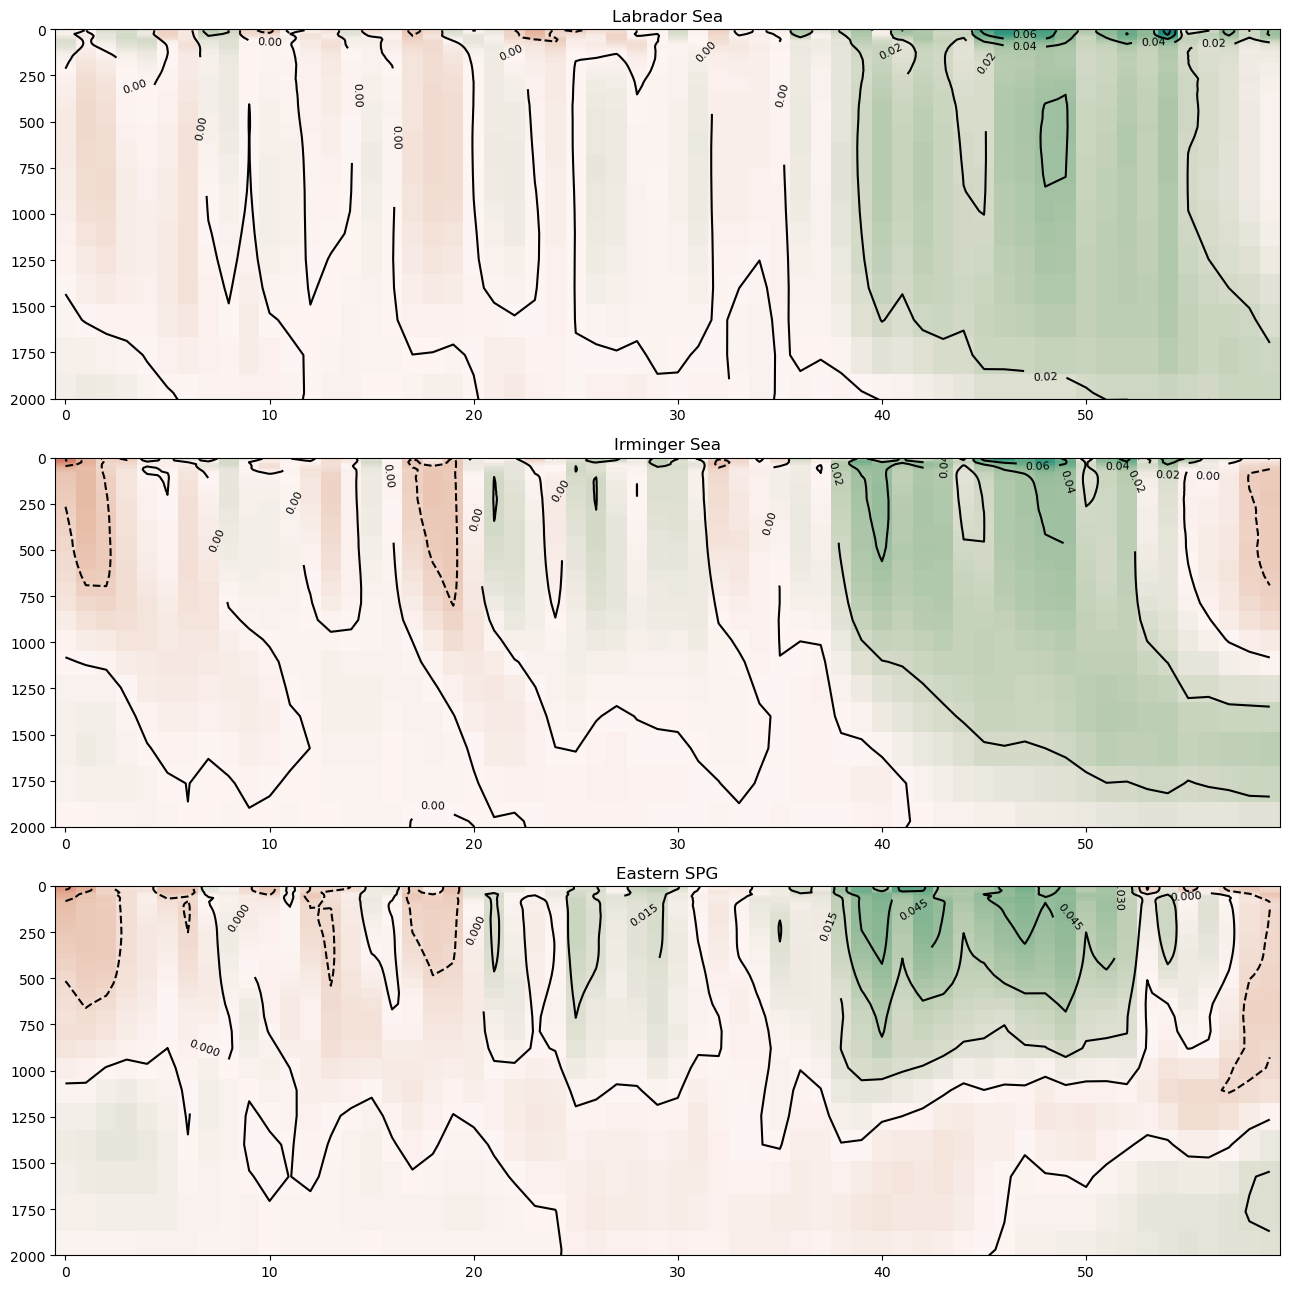

In [76]:
mask_sigma = da_sigma > 0.02
mask_sigma = mask_sigma.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
irm_region = ds_sigma_annual.SIGMA_2.where((irm_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)

anom_lab_region = lab_region - lab_region.isel(time=slice(0,40)).mean('time')
anom_esp_region = esp_region - esp_region.isel(time=slice(0,40)).mean('time')
anom_irm_region = irm_region - irm_region.isel(time=slice(0,40)).mean('time')

fig, axes = plt.subplots(3, 1, figsize=(13,13))

plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t,anom_lab_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_lab_region.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 2000])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea')

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_irm_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_irm_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 2000])  
axes[1].invert_yaxis()
axes[1].set_title('Irminger Sea')

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_esp_region.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 2000])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG')

plt.tight_layout()
plt.show()

# Refined Analysis

## Velocities at $\sigma_2 = 36.56$

In [7]:
# vvel file names
vvel_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
vvel_anomaly = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/vvel_anomaly.nc'
#load data
ds_vvel_mean = xr.open_dataset(vvel_annual).mean(dim='time')
ds_vvel_anom = xr.open_dataset(vvel_anomaly)
ds_sigma_mean = xr.open_dataset(sigma_annual).mean(dim='time')

# chnage units from cm to m
ds_vvel_mean['VVEL'] = ds_vvel_mean.VVEL *1e-2
ds_vvel_mean['VVEL'].attrs['units'] = 'm/s'
ds_vvel_anom['VVEL'] = ds_vvel_anom.VVEL *1e-2
ds_vvel_anom['VVEL'].attrs['units'] = 'm/s'

# Load your SIGMA_2 variable from the dataset
sigma_2 = ds_sigma_mean['SIGMA_2']
# Define the target value
target_value = 36.56
# Check for NaN values in sigma_2
if np.isnan(sigma_2).any():
    # Handle NaN values (for example, replace them with a specific value)
    sigma_2 = np.nan_to_num(sigma_2, nan=0)
# Calculate the index where SIGMA_2 is closest to the target value
index_closest = np.abs(sigma_2 - target_value).argmin(axis=0)

# Convert z_t_indices to an xarray DataArray for indexing
z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))

# Use the z_t_da to index the 'z_t' dimension of VVEL
s3656_VVEL = ds_vvel_mean.isel(z_t=z_t_da)
s3656_VVEL_anom = ds_vvel_anom.isel(z_t=z_t_da)

# roll to correct position
s3656_VVEL = s3656_VVEL.roll(nlon=+100)
s3656_VVEL_anom = s3656_VVEL_anom.roll(nlon=+100)

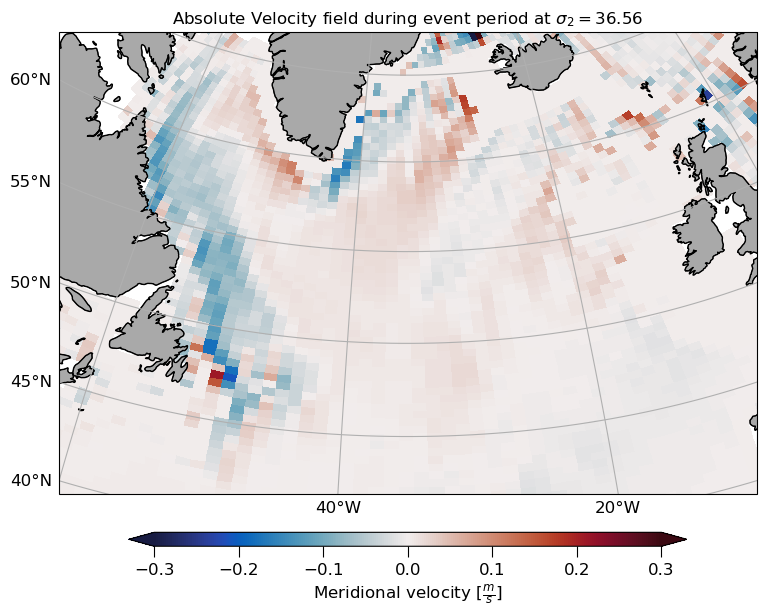

In [8]:
# Replace non-finite values and masked values
replacement_value = 0
s3656_VVEL['TLAT'] = xr.where(
    np.logical_or(np.isnan(s3656_VVEL['TLAT']), np.isinf(s3656_VVEL['TLAT']) | np.ma.getmask(s3656_VVEL['TLAT'])),
    replacement_value,
    s3656_VVEL['TLAT'])
s3656_VVEL['TLONG'] = xr.where(
    np.logical_or(np.isnan(s3656_VVEL['TLONG']), np.isinf(s3656_VVEL['TLONG']) | np.ma.getmask(s3656_VVEL['TLONG'])),
    replacement_value,
    s3656_VVEL['TLONG'])
plotting_data = s3656_VVEL.VVEL

# set kwargs
vmin = -0.3
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 12

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-60, -10, 40, 66], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
ax.coastlines()
plt.title('Absolute Velocity field during event period at $\sigma_2 = 36.56$', fontsize=labelsize)
plt.show()

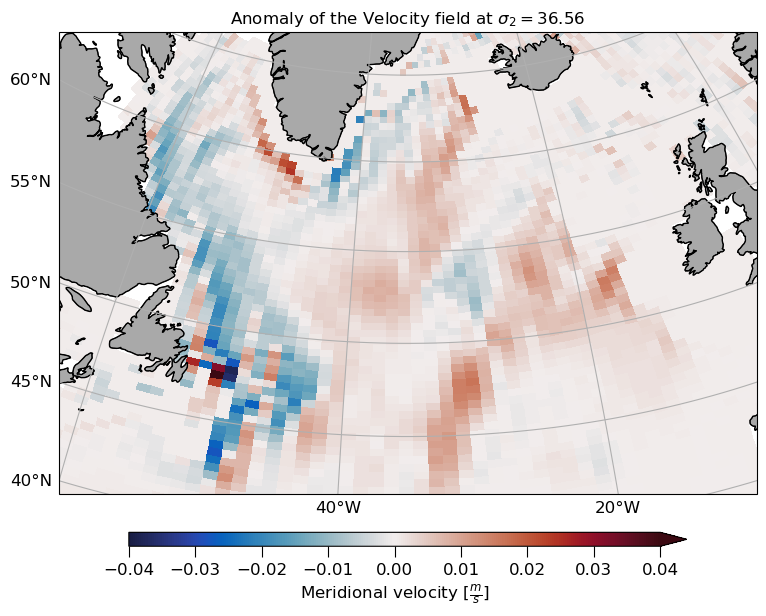

In [9]:
replacement_value = 0
# Replace non-finite values and masked values
s3656_VVEL_anom['TLAT'] = xr.where(
    np.logical_or(np.isnan(s3656_VVEL_anom['TLAT']), np.isinf(s3656_VVEL_anom['TLAT']) | np.ma.getmask(s3656_VVEL_anom['TLAT'])),
    replacement_value,
    s3656_VVEL_anom['TLAT'])

s3656_VVEL_anom['TLONG'] = xr.where(
    np.logical_or(np.isnan(s3656_VVEL_anom['TLONG']), np.isinf(s3656_VVEL_anom['TLONG']) | np.ma.getmask(s3656_VVEL_anom['TLONG'])),
    replacement_value,
    s3656_VVEL_anom['TLONG'])

plotting_data = s3656_VVEL_anom.VVEL

vmin = -0.04
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 12 

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-60, -10, 40, 66], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
ax.coastlines()
plt.title('Anomaly of the Velocity field at $\sigma_2 = 36.56$', fontsize=labelsize)
plt.show()

## Velocities at $\sigma_2 = 36.69$

In [8]:
# vvel file names
vvel_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
vvel_anomaly = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/vvel_anomaly.nc'
#load data
ds_vvel_mean = xr.open_dataset(vvel_annual).mean(dim='time')
ds_vvel_anom = xr.open_dataset(vvel_anomaly)
ds_sigma_mean = xr.open_dataset(sigma_annual).mean(dim='time')

# chnage units from cm to m
ds_vvel_mean['VVEL'] = ds_vvel_mean.VVEL *1e-2
ds_vvel_mean['VVEL'].attrs['units'] = 'm/s'
ds_vvel_anom['VVEL'] = ds_vvel_anom.VVEL *1e-2
ds_vvel_anom['VVEL'].attrs['units'] = 'm/s'

# Load your SIGMA_2 variable from the dataset
sigma_2 = ds_sigma_mean['SIGMA_2']
# Define the target value
target_value = 36.69
# Check for NaN values in sigma_2
if np.isnan(sigma_2).any():
    # Handle NaN values (for example, replace them with a specific value)
    sigma_2 = np.nan_to_num(sigma_2, nan=0)
# Calculate the index where SIGMA_2 is closest to the target value
index_closest = np.abs(sigma_2 - target_value).argmin(axis=0)

# Convert z_t_indices to an xarray DataArray for indexing
z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))

# Use the z_t_da to index the 'z_t' dimension of VVEL
s3669_VVEL = ds_vvel_mean.isel(z_t=z_t_da)
s3669_VVEL_anom = ds_vvel_anom.isel(z_t=z_t_da)

# roll to correct position
s3669_VVEL = s3669_VVEL.roll(nlon=+100)
s3669_VVEL_anom = s3669_VVEL_anom.roll(nlon=+100)

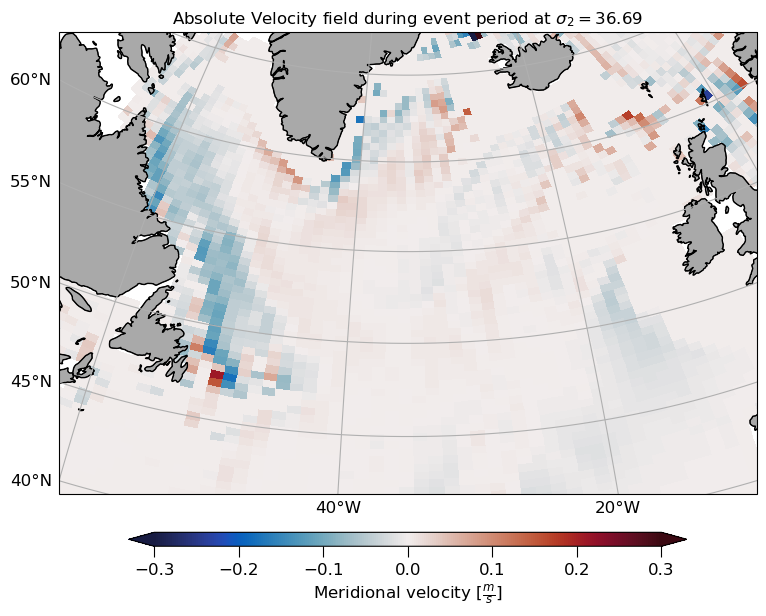

In [9]:
# Replace non-finite values and masked values
replacement_value = 0
s3669_VVEL['TLAT'] = xr.where(
    np.logical_or(np.isnan(s3669_VVEL['TLAT']), np.isinf(s3669_VVEL['TLAT']) | np.ma.getmask(s3669_VVEL['TLAT'])),
    replacement_value,
    s3669_VVEL['TLAT'])
s3669_VVEL['TLONG'] = xr.where(
    np.logical_or(np.isnan(s3669_VVEL['TLONG']), np.isinf(s3669_VVEL['TLONG']) | np.ma.getmask(s3669_VVEL['TLONG'])),
    replacement_value,
    s3669_VVEL['TLONG'])
plotting_data = s3669_VVEL.VVEL

# set kwargs
vmin = -0.3
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 12

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-60, -10, 40, 66], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
ax.coastlines()
plt.title('Absolute Velocity field during event period at $\sigma_2 = 36.69$', fontsize=labelsize)
plt.show()

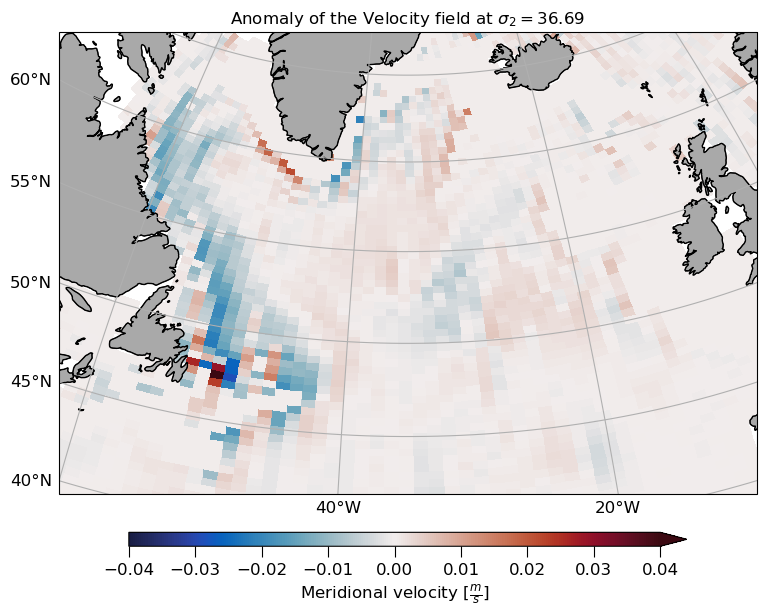

In [10]:
replacement_value = 0
# Replace non-finite values and masked values
s3669_VVEL_anom['TLAT'] = xr.where(
    np.logical_or(np.isnan(s3669_VVEL_anom['TLAT']), np.isinf(s3669_VVEL_anom['TLAT']) | np.ma.getmask(s3669_VVEL_anom['TLAT'])),
    replacement_value,
    s3669_VVEL_anom['TLAT'])

s3669_VVEL_anom['TLONG'] = xr.where(
    np.logical_or(np.isnan(s3669_VVEL_anom['TLONG']), np.isinf(s3669_VVEL_anom['TLONG']) | np.ma.getmask(s3669_VVEL_anom['TLONG'])),
    replacement_value,
    s3669_VVEL_anom['TLONG'])

plotting_data = s3669_VVEL_anom.VVEL

vmin = -0.04
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 12 

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-60, -10, 40, 66], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
ax.coastlines()
plt.title('Anomaly of the Velocity field at $\sigma_2 = 36.69$', fontsize=labelsize)
plt.show()

## Maximum overturning isopycnal

How does it change with time?

/tmp/ipykernel_92583/3980867694.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


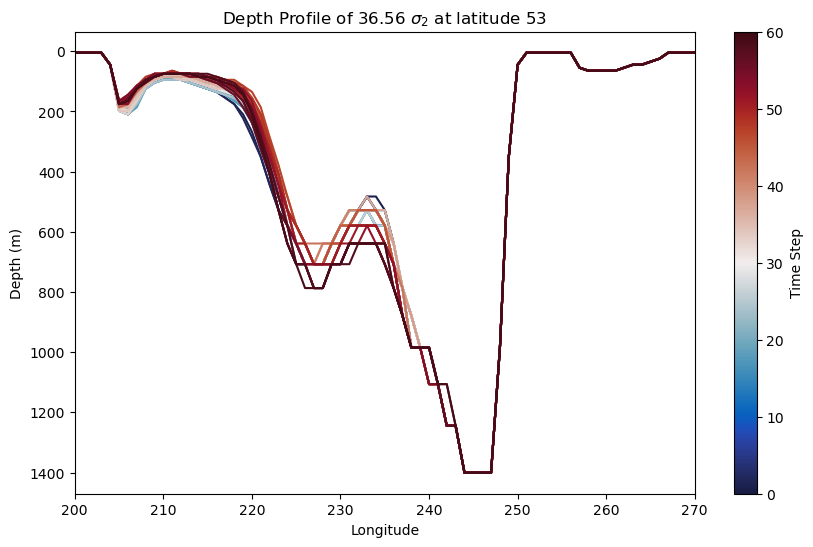

In [48]:
#load data
ds_sigma = xr.open_dataset(sigma_annual)

ds_sigma['z_t'] = ds_sigma.z_t *1e-2
ds_sigma['z_t'].attrs['units'] = 'm'

lat=ds_sigma.TLAT.isel(nlon=0, nlat=(slice(335, 336))).values[0]

plt.figure(figsize=(10, 6))

for i in range(60):
    sigma_2 = ds_sigma['SIGMA_2'].isel(time=i)
    target_value = 36.56
    if np.isnan(sigma_2).any():
        sigma_2 = np.nan_to_num(sigma_2, nan=0)
    index_closest = np.abs(sigma_2 - target_value).argmin(axis=0)

    z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))
    z_t = ds_sigma.z_t.isel(z_t=z_t_da)
    
    color = cmo.balance(i / 60)  # Get color for current time step
    plt.plot(z_t.isel(nlat=335), color=color)

plt.xlim(200, 270)
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.title('Depth Profile of 36.56 $\sigma_2$ at latitude {:.0f}'.format(lat))
plt.gca().invert_yaxis()  # Set y-axis to increase downwards

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=0, vmax=60))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Time Step')

plt.show()

/tmp/ipykernel_92583/880040439.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


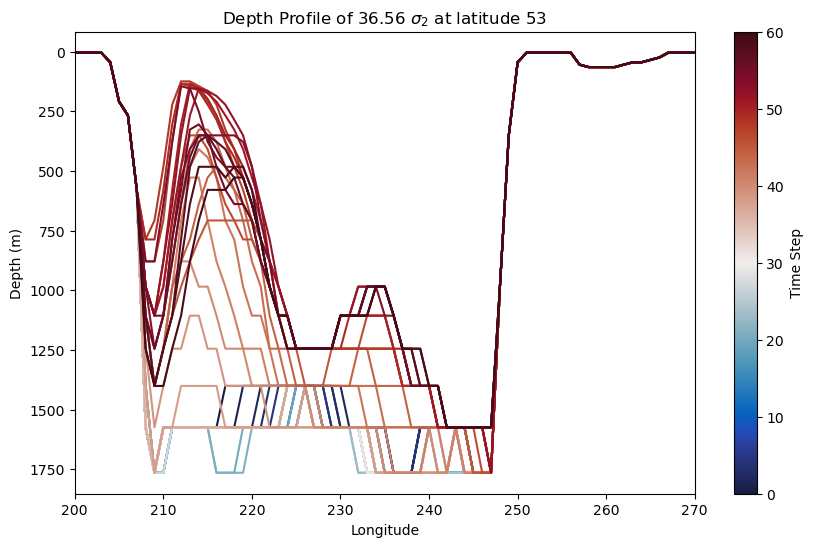

In [49]:
#load data
ds_sigma = xr.open_dataset(sigma_annual)

ds_sigma['z_t'] = ds_sigma.z_t *1e-2
ds_sigma['z_t'].attrs['units'] = 'm'

lat=ds_sigma.TLAT.isel(nlon=0, nlat=(slice(335, 336))).values[0]

plt.figure(figsize=(10, 6))

for i in range(60):
    sigma_2 = ds_sigma['SIGMA_2'].isel(time=i)
    target_value = 36.69
    if np.isnan(sigma_2).any():
        sigma_2 = np.nan_to_num(sigma_2, nan=0)
    index_closest = np.abs(sigma_2 - target_value).argmin(axis=0)

    z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))
    z_t = ds_sigma.z_t.isel(z_t=z_t_da)
    
    color = cmo.balance(i / 60)  # Get color for current time step
    plt.plot(z_t.isel(nlat=335), color=color)

plt.xlim(200, 270)
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.title(' at Lat: ', )
plt.title('Depth Profile of 36.56 $\sigma_2$ at latitude {:.0f}'.format(lat))
plt.gca().invert_yaxis()  # Set y-axis to increase downwards

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=0, vmax=60))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Time Step')

plt.show()

## Isopycnal range

In [15]:
ds_sigma = xr.open_dataset(sigma_annual)

ds_sigma['z_t'] = ds_sigma.z_t * 1e-2
ds_sigma['z_t'].attrs['units'] = 'm'

lat = ds_sigma.TLAT.isel(nlon=0, nlat=335).values

# Define target range
target_min = 36.6
target_max = 36.7

sigma_2 = ds_sigma['SIGMA_2'].isel(time=0, nlat=335)

# Find indices where sigma_2 falls within the target range
dens_range = (sigma_2 >= target_min) & (sigma_2 <= target_max)

In [16]:
dens_range.shape

(60, 320)

In [17]:
z_t_da = xr.DataArray(dens_range, dims=('z_t', 'nlon'))


In [18]:
z_t_range = ds_sigma.z_t.where(z_t_da)

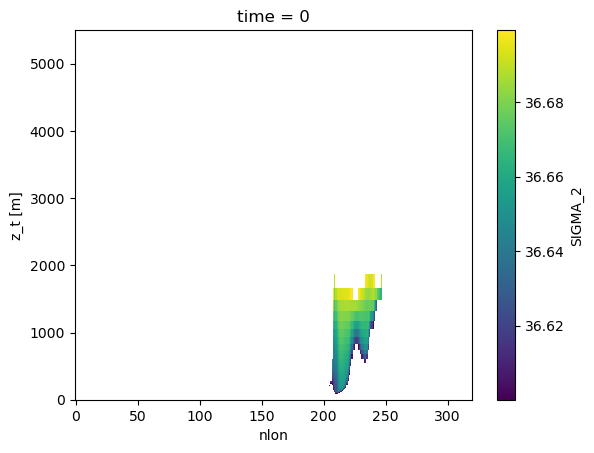

In [22]:
sigma_2.where(z_t_da).plot()

In [4]:
ds_sigma = xr.open_dataset(sigma_annual)

ds_sigma['z_t'] = ds_sigma.z_t * 1e-2
ds_sigma['z_t'].attrs['units'] = 'm'

lat = ds_sigma.TLAT.isel(nlon=0, nlat=(slice(335, 336))).values[0]

plt.figure(figsize=(10, 6))

# Define target range
target_min = 36.6
target_max = 36.7

for i in range(60):
    sigma_2 = ds_sigma['SIGMA_2'].isel(time=i)
    
    # Check for NaN values
    if np.isnan(sigma_2).any():
        sigma_2 = np.nan_to_num(sigma_2, nan=0)
    
    # Find indices where sigma_2 falls within the target range
    within_range = (sigma_2 >= target_min) & (sigma_2 <= target_max)
    

    z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))
    z_t = ds_sigma.z_t.isel(z_t=z_t_da)
    
    color = cmo.balance(i / 60)  # Get color for current time step
    plt.plot(z_t.isel(nlat=335), color=color)

plt.xlim(200, 270)
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.title('Depth Profile within {:.2f}-{:.2f} $\sigma_2$ range at latitude {:.0f}'.format(target_min, target_max, lat))
plt.gca().invert_yaxis()  # Set y-axis to increase downwards

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=0, vmax=60))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Time Step')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'time'

<Figure size 1000x600 with 0 Axes>

## Same isopycnal, now at 63 deg

/tmp/ipykernel_107406/113871136.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


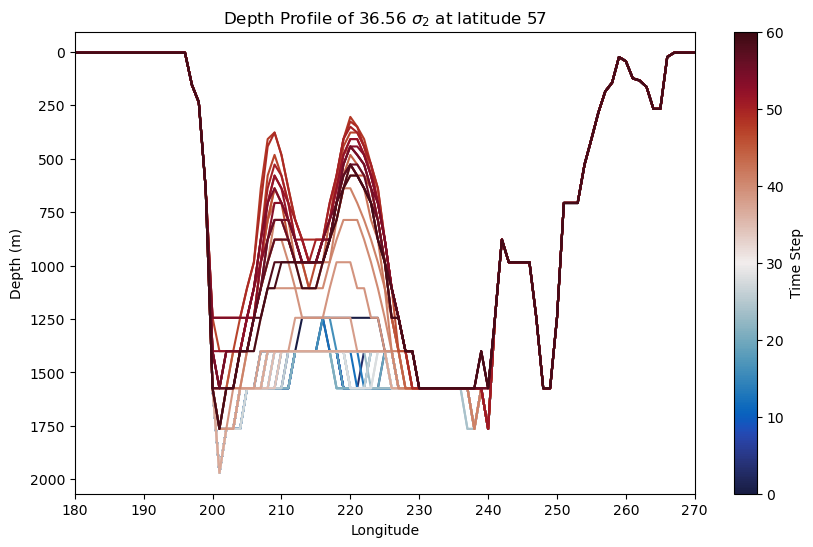

In [5]:
#load data
ds_sigma = xr.open_dataset(sigma_annual)

ds_sigma['z_t'] = ds_sigma.z_t *1e-2
ds_sigma['z_t'].attrs['units'] = 'm'

lat_1=ds_sigma.TLAT.isel(nlon=0, nlat=(slice(346, 347))).values[0]

plt.figure(figsize=(10, 6))

for i in range(60):
    sigma_2 = ds_sigma['SIGMA_2'].isel(time=i)
    target_value = 36.69
    if np.isnan(sigma_2).any():
        sigma_2 = np.nan_to_num(sigma_2, nan=0)
    index_closest = np.abs(sigma_2 - target_value).argmin(axis=0)

    z_t_da = xr.DataArray(index_closest, dims=('nlat', 'nlon'))
    z_t = ds_sigma.z_t.isel(z_t=z_t_da)
    
    color = cmo.balance(i / 60)  # Get color for current time step
    plt.plot(z_t.isel(nlat=346), color=color)

plt.xlim(180, 270)
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.title(' at Lat: ', )
plt.title('Depth Profile of 36.56 $\sigma_2$ at latitude {:.0f}'.format(lat_1))
plt.gca().invert_yaxis()  # Set y-axis to increase downwards

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=0, vmax=60))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Time Step')

plt.show()

## Absolute values and their change over time 

In [13]:
ds_sigma = xr.open_dataset(sigma_path)

ds_sigma_annual = xr.open_dataset(sigma_annual)
time=np.arange(0, len(ds_sigma_annual.time.values))

for ds in (ds_sigma, ds_sigma_annual):
    ds['z_t'] = ds.z_t *1e-2
    ds['z_t'].attrs['units'] = 'm'

In [14]:
path= '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/'
data_file = [path+'temp_anomaly.nc',path+'salt_anomaly.nc',path+'hmxl_anomaly.nc',path+'shf_anomaly.nc',path+'ssh_anomaly.nc', path+'sigma_anomaly.nc']
variable_name = ['TEMP','SALT','HMXL','SHF','SSH','SIGMA_2']
std_file = [path+'temp_mean_std.nc',path+'salt_mean_std.nc',path+'hmxl_mean_std.nc',path+'shf_mean_std.nc',path+'ssh_mean_std.nc']

da_sigma, sigma_std = open_and_replace(data_file[5], std_file[1], variable_name[5])

In [20]:
grid_name = 'POP_gx1v7'
region_defs_lab = {'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [54.0, 60.0]}}]} 
lab_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_lab, mask_name='lab')

region_defs_esp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [54., 60.],'TLONG': [340., 355.]}}],}
esp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_esp, mask_name='esp')

region_defs_csp = {'NorthAtlantic': [{'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [54., 60.],'TLONG': [300., 340.]}}],}
csp_mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs_csp, mask_name='csp')

lab_mask3d = lab_mask3d.roll(nlon=-100)
esp_mask3d = esp_mask3d.roll(nlon=-100)
csp_mask3d = csp_mask3d.roll(nlon=-100)

mask_sigma = da_sigma > 0.03
mask_sigma = mask_sigma.roll(nlon=-100)

lab_region = ds_sigma_annual.SIGMA_2.where((lab_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
esp_region = ds_sigma_annual.SIGMA_2.where((esp_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)
csp_region = ds_sigma_annual.SIGMA_2.where((csp_mask3d == 1) & (mask_sigma == 1)).mean(dim=['nlat','nlon']).isel(region=0)



In [ ]:
vmin, vmax = 34.8, 37.1 

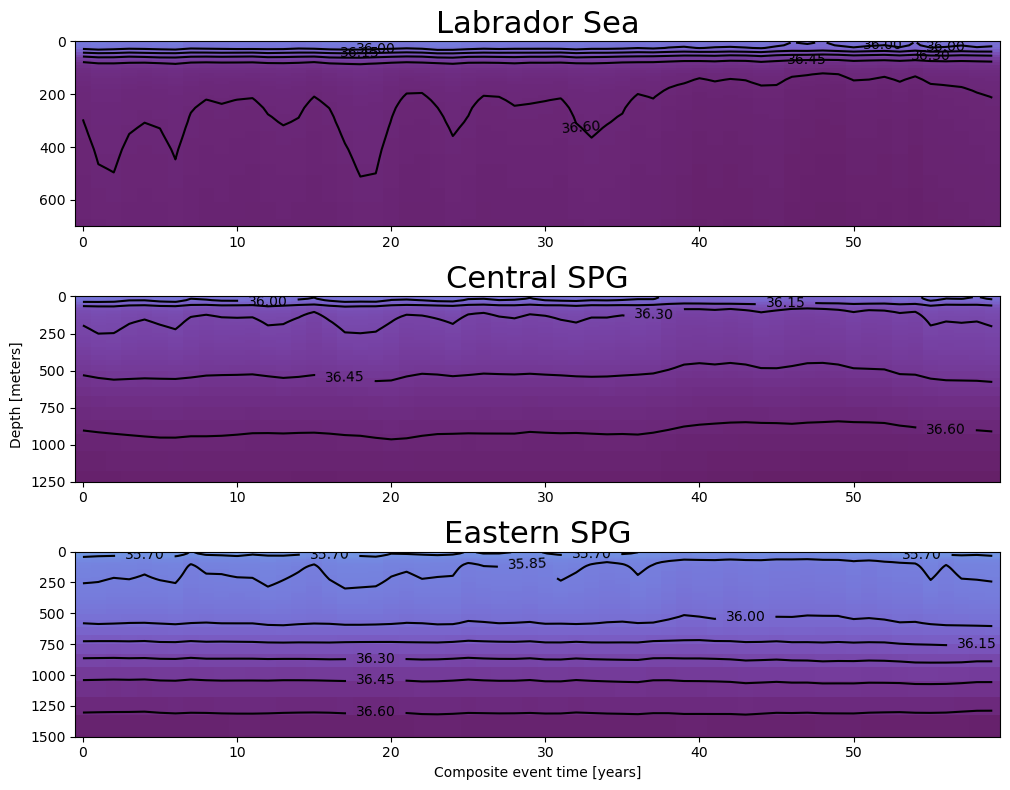

In [77]:


fig, axes = plt.subplots(3, 1, figsize=(10,8))

plt.subplots_adjust(hspace=0.5) 

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t, lab_region.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, lab_region.T, colors='k')
#axes[0].clabel(contour_plot, inline=True, fontsize=10)
axes[0].clabel(contour_plot, inline=False, fontsize=10)
axes[0].set_ylim([0, 700])  
axes[0].invert_yaxis()
axes[0].set_title('Labrador Sea', fontsize=22)

pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, csp_region.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, csp_region.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=10)
axes[1].set_ylim([0, 1250])  
axes[1].invert_yaxis()
axes[1].set_title('Central SPG', fontsize=22)

pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, esp_region.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, esp_region.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=10)
axes[2].set_ylim([0, 1500])  
axes[2].invert_yaxis()
axes[2].set_title('Eastern SPG', fontsize=22)

plt.xlabel('Composite event time [years]')
#plt.ylabel('Depth [meters]')

# Add ylabel spanning all subplots
fig.text(-0.005, 0.5, 'Depth [meters]', va='center', rotation='vertical')


plt.tight_layout()
plt.show()

# Density flip books

In [28]:
files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite*.nc'))

variables = 'SIGMA_2'
labels = r'Potential Density Anomaly $\Delta\sigma_2$ [$\frac{kg}{m^3} -1000$]'
cmaps = cmo.curl_r
vmins = -0.1

## set up region mask
grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [15.0, 66.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
mask = pop_tools.region_mask_3d(grid_name, 
                                  region_defs=region_defs, 
                                  mask_name='Subpolar Gyre')
mask = mask.sum('region')  

## create data

var = variables
ds_var_annual = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/' + var + 'composite.nc').roll(nlon=+100)
replacement_value = 0
# Replace non-finite values and masked values
ds_var_annual['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_var_annual['TLAT']), np.isinf(ds_var_annual['TLAT']) | np.ma.getmask(ds_var_annual['TLAT'])),
    replacement_value,
    ds_var_annual['TLAT'])

ds_var_annual['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_var_annual['TLONG']), np.isinf(ds_var_annual['TLONG']) | np.ma.getmask(ds_var_annual['TLONG'])),
    replacement_value,
    ds_var_annual['TLONG'])
vmin = vmins
vmax = -vmin
slices = [slice(5.0000000e+02,1.0500000e+04), # first 100 meters
        slice(1.0500000e+04,2.0971139e+04), # 100-200 meters
        slice(2.0971139e+04,3.0511922e+04), # 200-300 meters
        slice(3.0511922e+04,5.2772801e+04), # 300-500 meters
        slice(5.2772801e+04,9.8470586e+04), # 500-1000 meters
        slice(9.8470586e+04,1.5739464e+05)] # 1000-1500 meters

names = ['0-100 meters', '100-200 meters', '200-300 meters', '300-500 meters', '500-1000 meters', '1000-1500 meters']

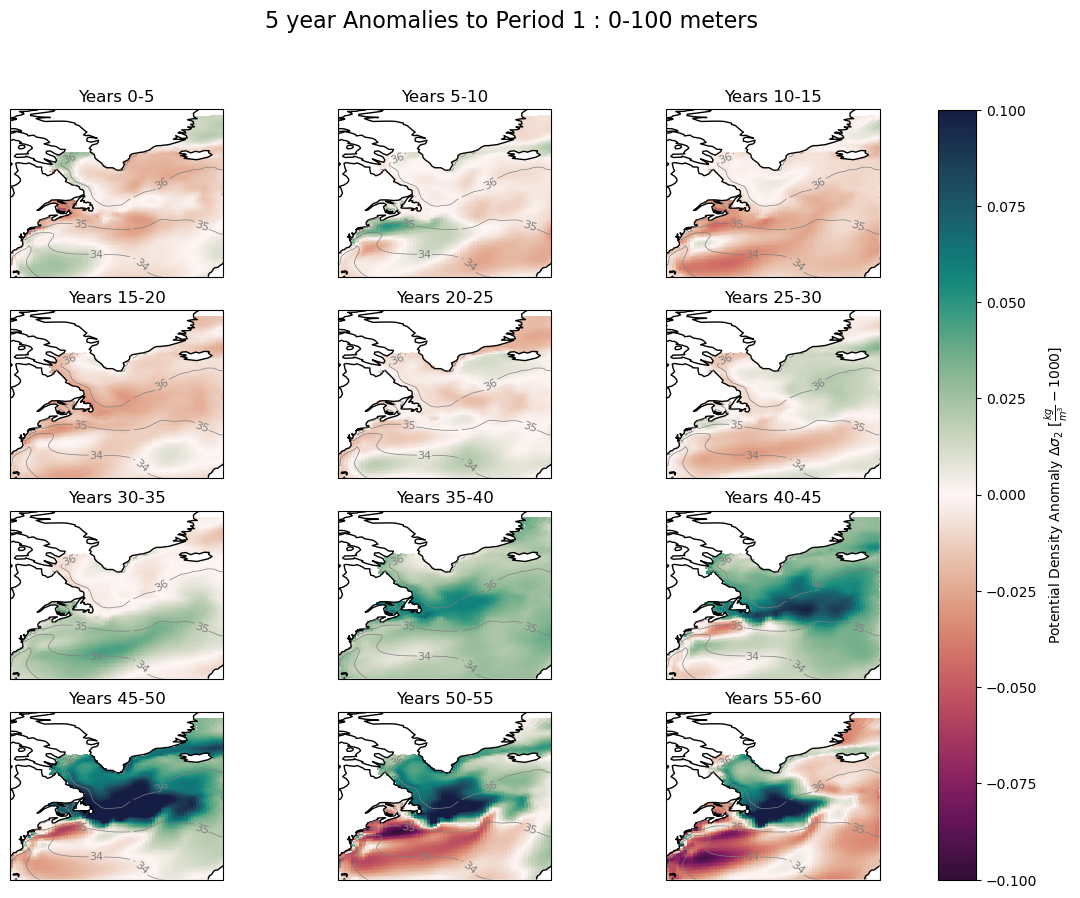

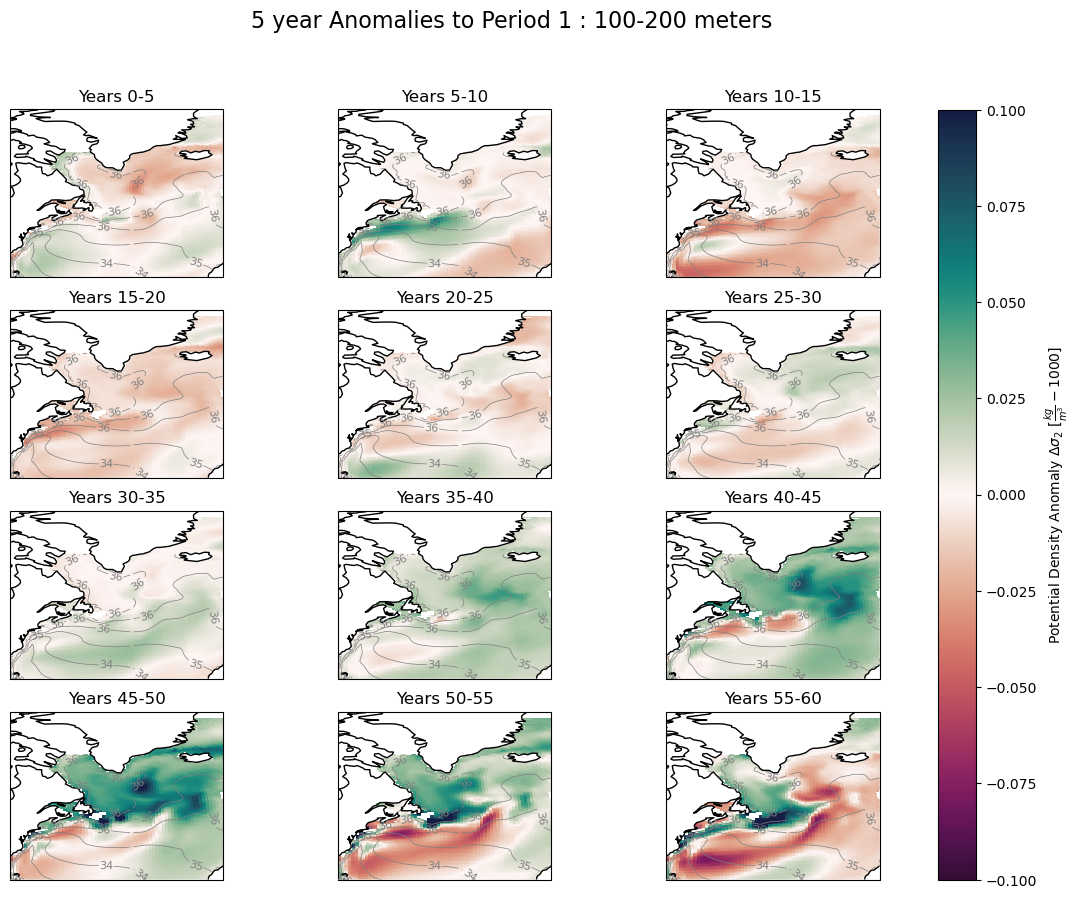

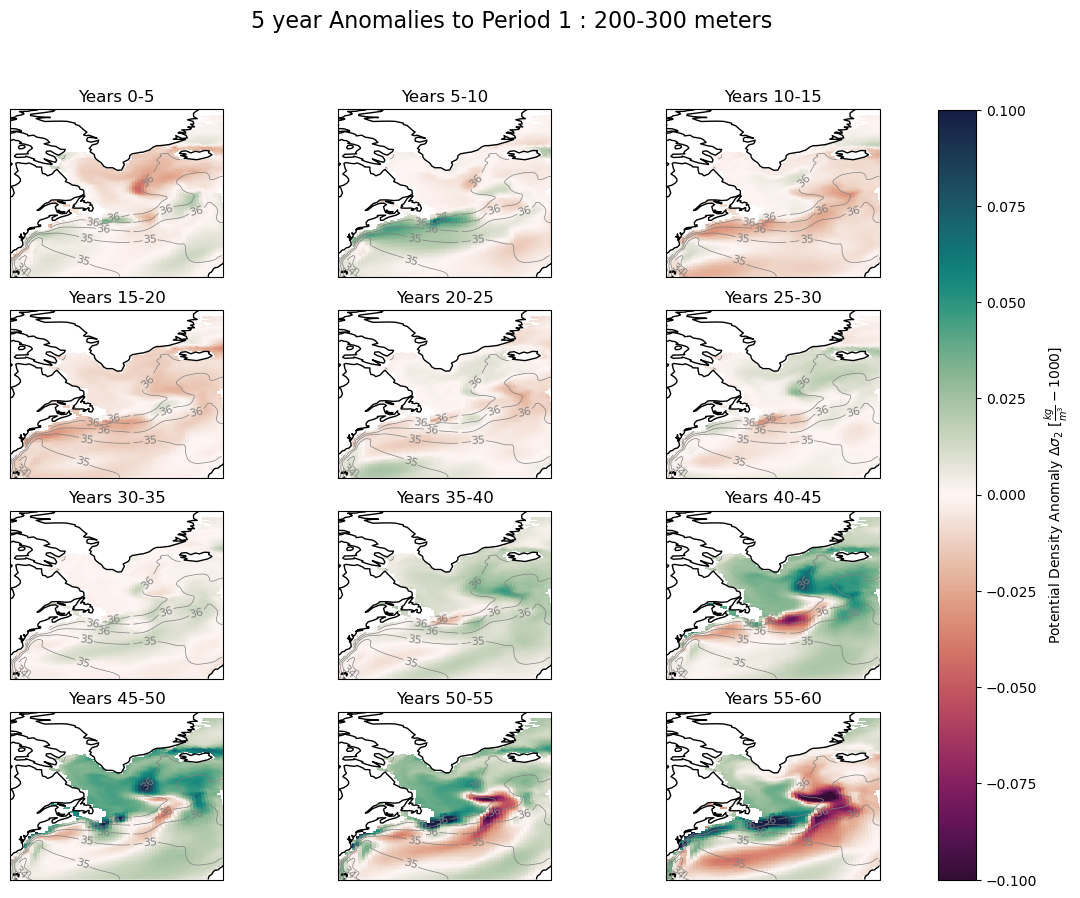

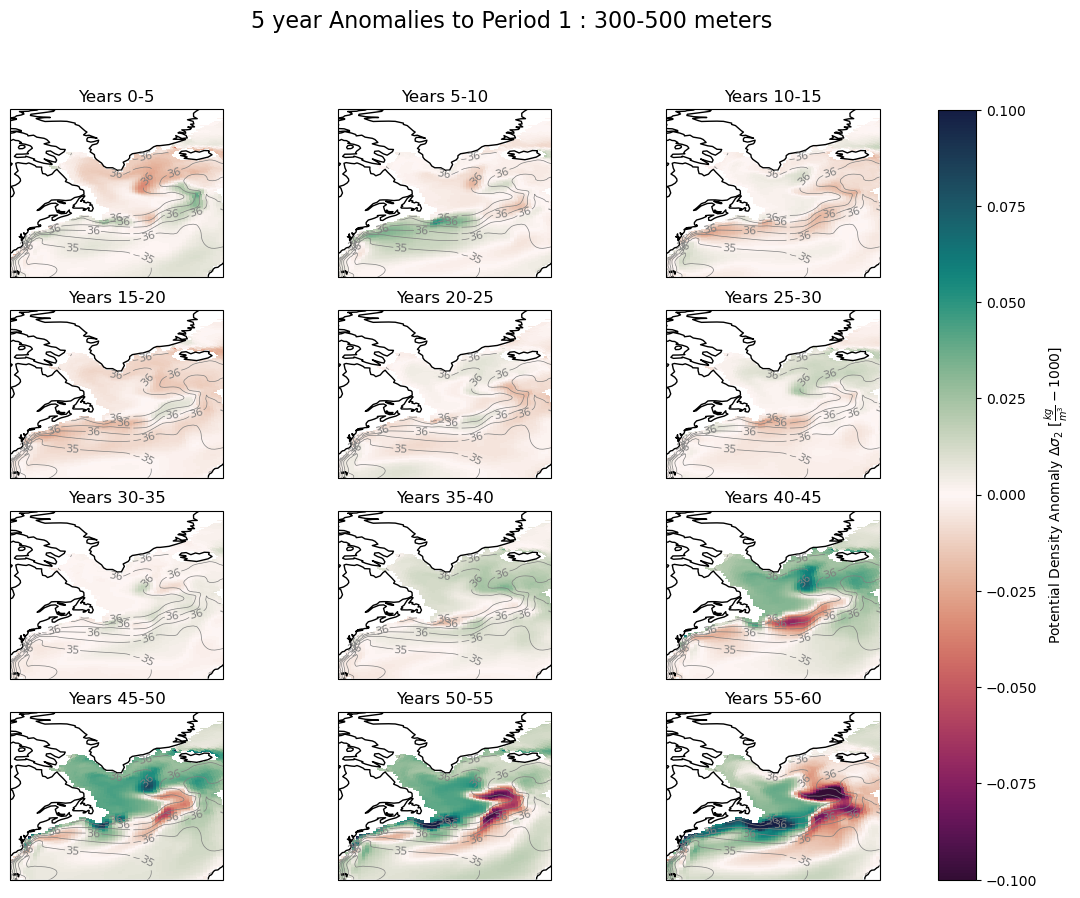

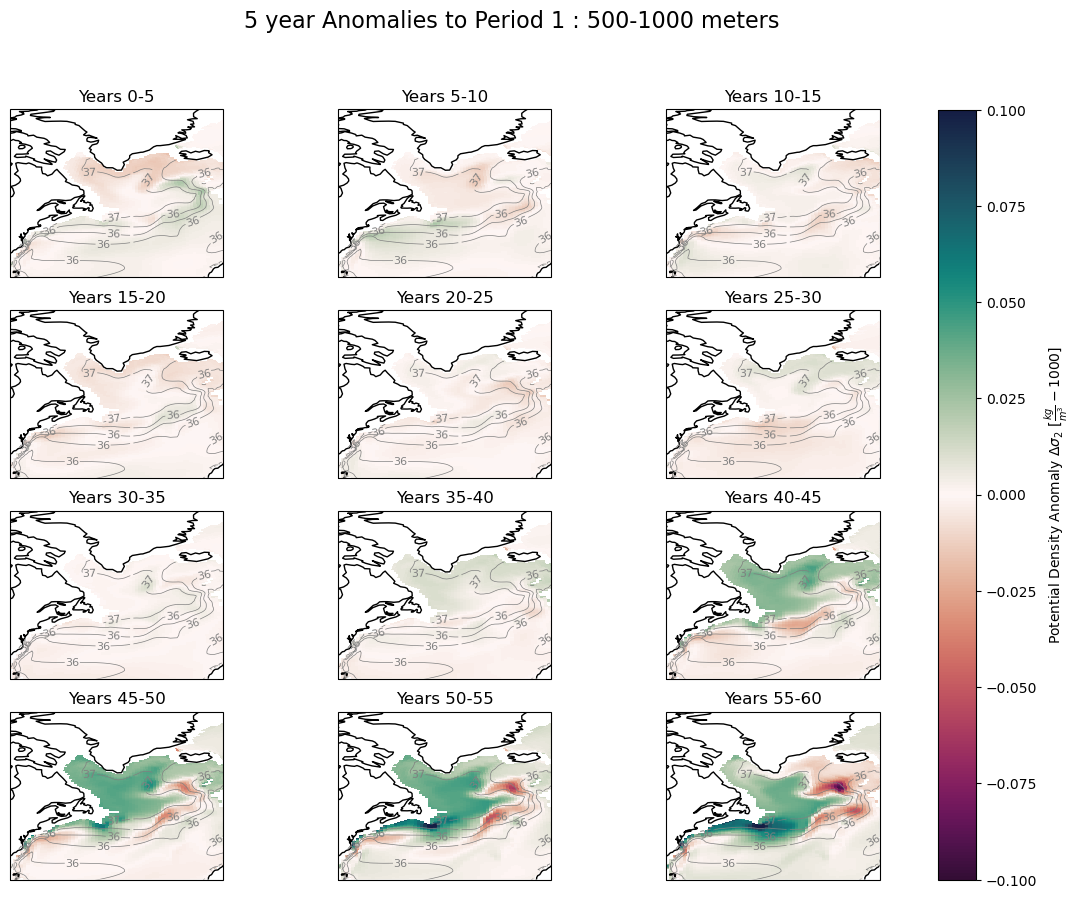

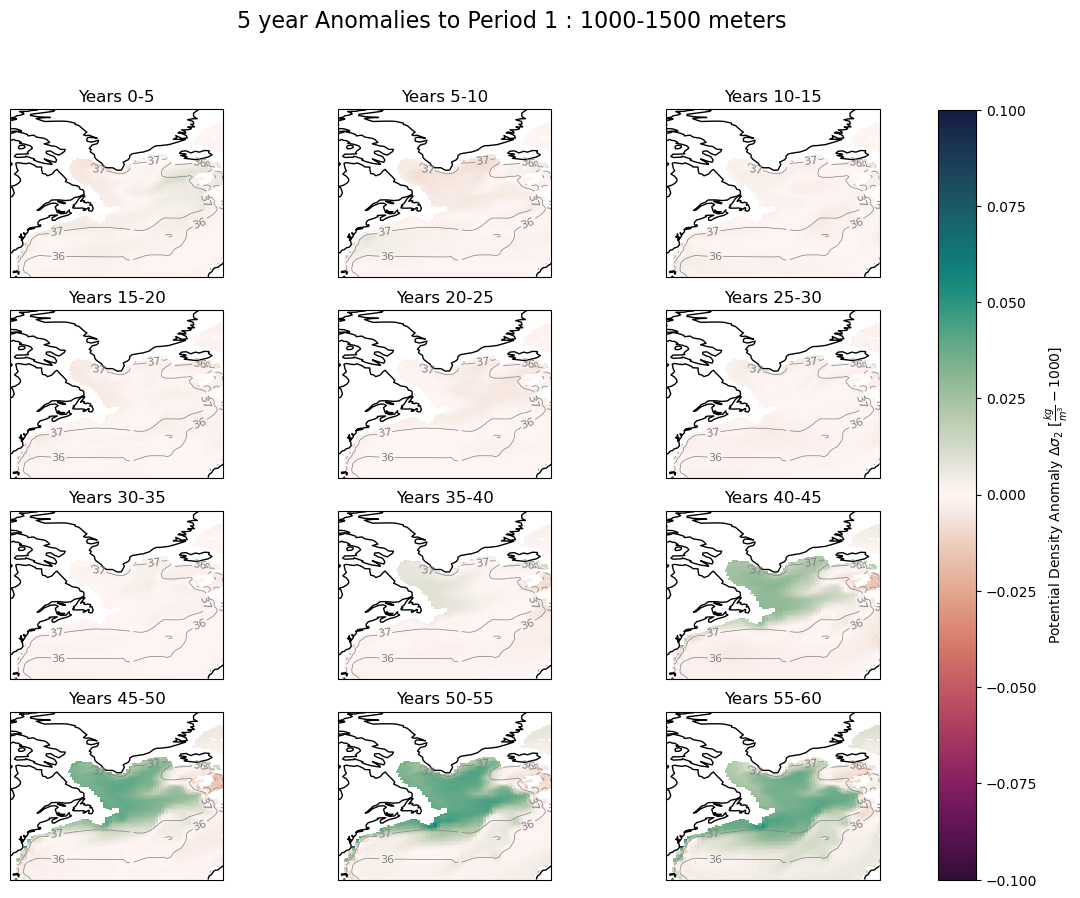

In [31]:
for s in range(len(slices)):
    ds_var = ds_var_annual.sel(z_t=slices[s]).mean('z_t')
    ds = ds_var - ds_var.isel(time=slice(0,40)).mean('time')

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    for i, ax in enumerate(axes.flatten()):
        pc = ds[var].isel(time=range(i * 5, i * 5 + 5)).mean('time').plot.pcolormesh(ax=ax, 
                                                                                        transform=ccrs.PlateCarree(),
                                                                                        x='TLONG', 
                                                                                        y='TLAT',
                                                                                        cmap=cmaps,
                                                                                        vmin = vmin, vmax = vmax,
                                                                                        add_colorbar=False,) 
        ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
        ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
        ax.coastlines()
        cs = ax.contour(ds.TLONG, ds.TLAT, ds_var[var].isel(time=slice(0, 40)).mean('time').where(mask == 1), linewidths=0.5, colors='gray',transform=ccrs.PlateCarree())
        ax.clabel(cs, fmt='%1.0f', inline=True, fontsize=8)
    cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=labels)
    fig.suptitle('5 year Anomalies to Period 1 : '+names[s], fontsize=16)
    plt.show()
    #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+var+'_5year_anomalies.png', bbox_inches='tight', dpi=300)    